# 모듈 불러오기

#### 기본

In [2]:
import numpy as np
import pandas as pd
import joblib

In [3]:
# !conda install numpy 
# !conda install pandas
# !conda install scikit-learn
# !conda install scipy
# !conda install tensorflow
# !conda install matplotlib
# !conda install seaborn

# !pip install xgboost
# !pip install lightgbm
# !pip install catboost
# !pip install ipywidgets
# !jupyter nbextension enable --py widgetsnbextension
# !pip install hyperopt
# !pip install -U imbalanced-learn
# !pip install missingno

#### 전처리

In [4]:
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance

from sklearn import impute
from sklearn.impute import KNNImputer
from sklearn.experimental import enable_iterative_imputer

#### 리샘플링

In [5]:
from imblearn.over_sampling import (
    RandomOverSampler, 
    ADASYN, 
    SMOTE
)
from imblearn.under_sampling import (
    RandomUnderSampler, 
    TomekLinks, 
    CondensedNearestNeighbour, 
    OneSidedSelection, 
    EditedNearestNeighbours, 
    NeighbourhoodCleaningRule
)

#### 분석

In [6]:
from scipy.stats import skew, kurtosis
from scipy.stats import ttest_ind, f_oneway, pearsonr

#### 회귀

In [7]:
from sklearn.linear_model import LinearRegression as RL
from sklearn.neighbors import KNeighborsRegressor as KNNR
from sklearn.tree import DecisionTreeRegressor as DTR
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor as RFR
from xgboost import XGBRegressor as XGBR
from lightgbm import LGBMRegressor as LGBMR
from catboost import CatBoostRegressor as CBR

from lightgbm import plot_importance as lgbm_plot_importance
from xgboost import plot_importance as xgb_plot_importance
from catboost import Pool

from sklearn.metrics import mean_squared_error as mse
from sklearn.metrics import r2_score

#### 분류

In [8]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.neighbors import KNeighborsClassifier as KNNC
from sklearn.tree import DecisionTreeClassifier as DTC
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier as RFC
from xgboost import XGBClassifier as XGBC
from lightgbm import LGBMClassifier as LGBMC
from catboost import CatBoostClassifier as CBC

from sklearn.metrics import confusion_matrix as cmatrix
from sklearn.metrics import classification_report as creport
from sklearn.metrics import recall_score as recall
from sklearn.metrics import accuracy_score as acc
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer

#### 교차검증

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from catboost import cv
import hyperopt

from sklearn.model_selection import (
    StratifiedKFold, # 분류
    KFold, # 회귀
    # GroupKFold, 
    # RepeatedKFold, 
    # StratifiedGroupKFold, 
    # RepeatedStratifiedKFold
)

#### 시각화

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rc('font', family='Malgun Gothic')
sns.set(font="Malgun Gothic",
        rc={"axes.unicode_minus":False}, # 마이너스 부호 깨짐 현상 해결
        style='darkgrid')  

import warnings
warnings.filterwarnings(action='ignore')
%config InlineBackend.figure_format = 'retina'

# 건물 데이터 로드

In [11]:
# folder_name = '건물'
# file_name = 'GIS건물통합정보_fix'

# df_all_origin = pd.read_excel(f'../../data/{folder_name}/{file_name}.xlsx', engine='openpyxl')

In [12]:
folder_name = '건물'
file_name = 'GIS건물통합정보_강서구'

bd_df_origin = pd.read_excel(f'../../data/{folder_name}/{file_name}.xlsx', engine='openpyxl')

In [13]:
bd_df = bd_df_origin.copy()

# 데이터 이해

In [14]:
bd_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28900 entries, 0 to 28899
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Unnamed: 0  28900 non-null  int64         
 1   법정동명        28900 non-null  object        
 2   지번          28900 non-null  object        
 3   용도명         28900 non-null  object        
 4   구조명         28900 non-null  object        
 5   면적          28900 non-null  float64       
 6   사용승인일자      28900 non-null  datetime64[ns]
 7   연면적         28900 non-null  float64       
 8   대지면적        28900 non-null  float64       
 9   높이          28900 non-null  float64       
 10  건폐율         28900 non-null  float64       
 11  용적율         28900 non-null  float64       
 12  사용승인년도      28900 non-null  int64         
dtypes: datetime64[ns](1), float64(6), int64(2), object(4)
memory usage: 2.9+ MB


In [15]:
bd_df.isna().sum()

Unnamed: 0    0
법정동명          0
지번            0
용도명           0
구조명           0
면적            0
사용승인일자        0
연면적           0
대지면적          0
높이            0
건폐율           0
용적율           0
사용승인년도        0
dtype: int64

# 시각화 세팅, 함수

In [16]:
figure_size = (18, 10)
marker = 'o'
color = 'black'
title_size = 15

In [17]:
def linegraph(df, title='제목 입력하기', rotation=0, path='./img/인구'):
    plt.plot(df, marker=marker, color=color)
    plt.xticks(rotation=rotation)
    plt.title(title, size=title_size)
    plt.tight_layout()
    plt.savefig(f'{path}/{title}.png')
    plt.show()

# 강서구 시공연도별 건물수

In [18]:
bd_df['사용승인년대'] = bd_df['사용승인일자'].dt.year.astype(str).str.slice(0,3) + '0'

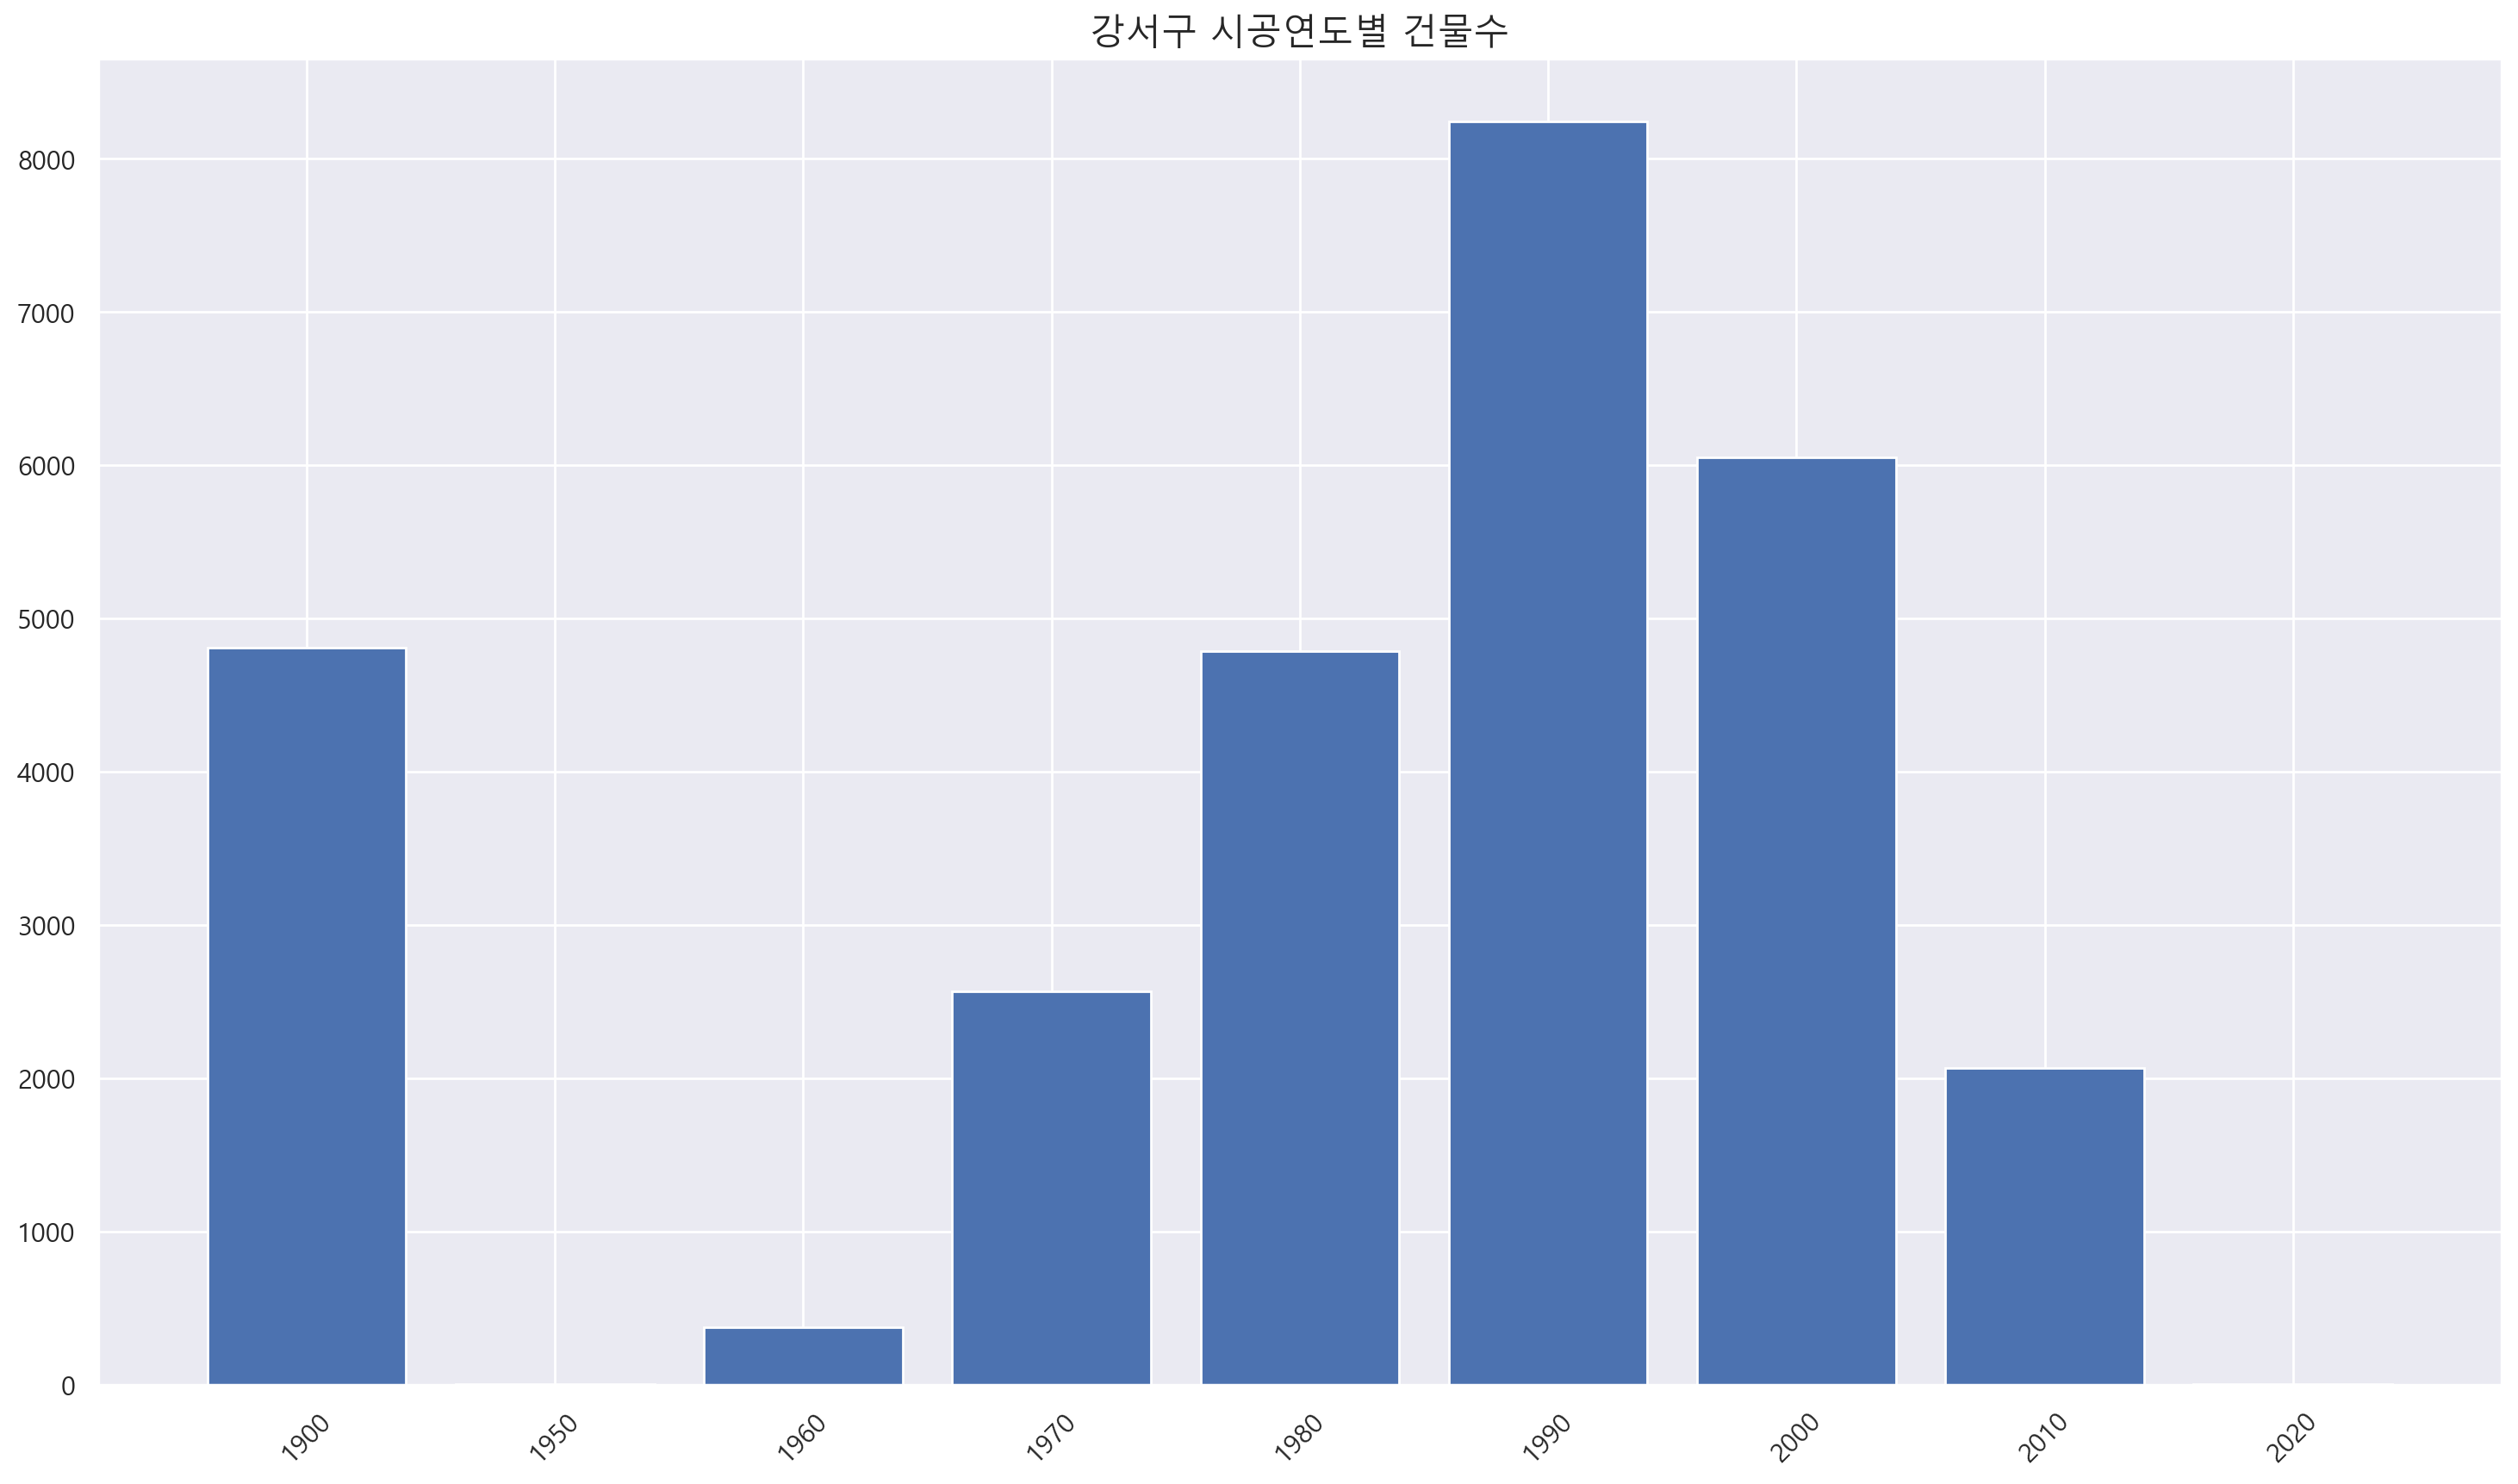

In [19]:
tmp_s = bd_df['사용승인년대'].value_counts()

tmp_df = pd.DataFrame({'연도':tmp_s.index, '개수': tmp_s.values}).set_index('연도').sort_index()
title = '강서구 시공연도별 건물수'

plt.figure(figsize=figure_size)
plt.bar(tmp_df.index, tmp_df['개수'])
plt.xticks(rotation=45)
plt.title(title, size=title_size)
plt.savefig(f'../../img/건물/강서구 건물 노후도/{title}.png')
plt.show()

# 동별 시공연도별 건물수

In [20]:
bd_df

,Unnamed: 0,법정동명,지번,용도명,구조명,면적,사용승인일자,연면적,대지면적,높이,건폐율,용적율,사용승인년도,사용승인년대
0,0,서울특별시 강서구 염창동,5-17,단독주택,블록구조,29.76,1900-01-01,29.76,0.0,0.00,0.00,0.00,1900,1900
1,1,서울특별시 강서구 염창동,5-17,단독주택,블록구조,37.34,1900-01-01,37.34,0.0,0.00,0.00,0.00,1900,1900
2,2,서울특별시 강서구 염창동,20-31,미상,미상,0.00,1900-01-01,0.00,0.0,0.00,0.00,0.00,1900,1900
3,3,서울특별시 강서구 염창동,20-31,미상,미상,0.00,1900-01-01,0.00,0.0,0.00,0.00,0.00,1900,1900
4,4,서울특별시 강서구 염창동,20-31,미상,미상,0.00,1900-01-01,0.00,0.0,0.00,0.00,0.00,1900,1900
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28895,28895,서울특별시 강서구 오쇠동,141-7,미상,미상,0.00,1900-01-01,0.00,0.0,0.00,0.00,0.00,1900,1900
28896,28896,서울특별시 강서구 오쇠동,150-5,위험물저장및처리시설,철근콘크리트구조,747.80,1992-12-05,539.92,4442.0,0.00,16.83,17.19,1992,1990
28897,28897,서울특별시 강서구 오쇠동,150-5,제2종근린생활시설,철근콘크리트구조,112.00,1992-12-05,289.60,4420.0,7.30,16.83,17.19,1992,1990
28898,28898,서울특별시 강서구 오쇠동,157-5,창고시설,일반철골구조,294.55,1979-09-01,294.55,3203.0,6.85,9.19,9.19,1979,1970


In [ ]:
bd_df['법정동명'].str.split(expand=True)[:].loc[:, 2]

In [40]:
bd_df['법정동명'] = bd_df['법정동명'].str.split(expand=True)[:].loc[:, 2]

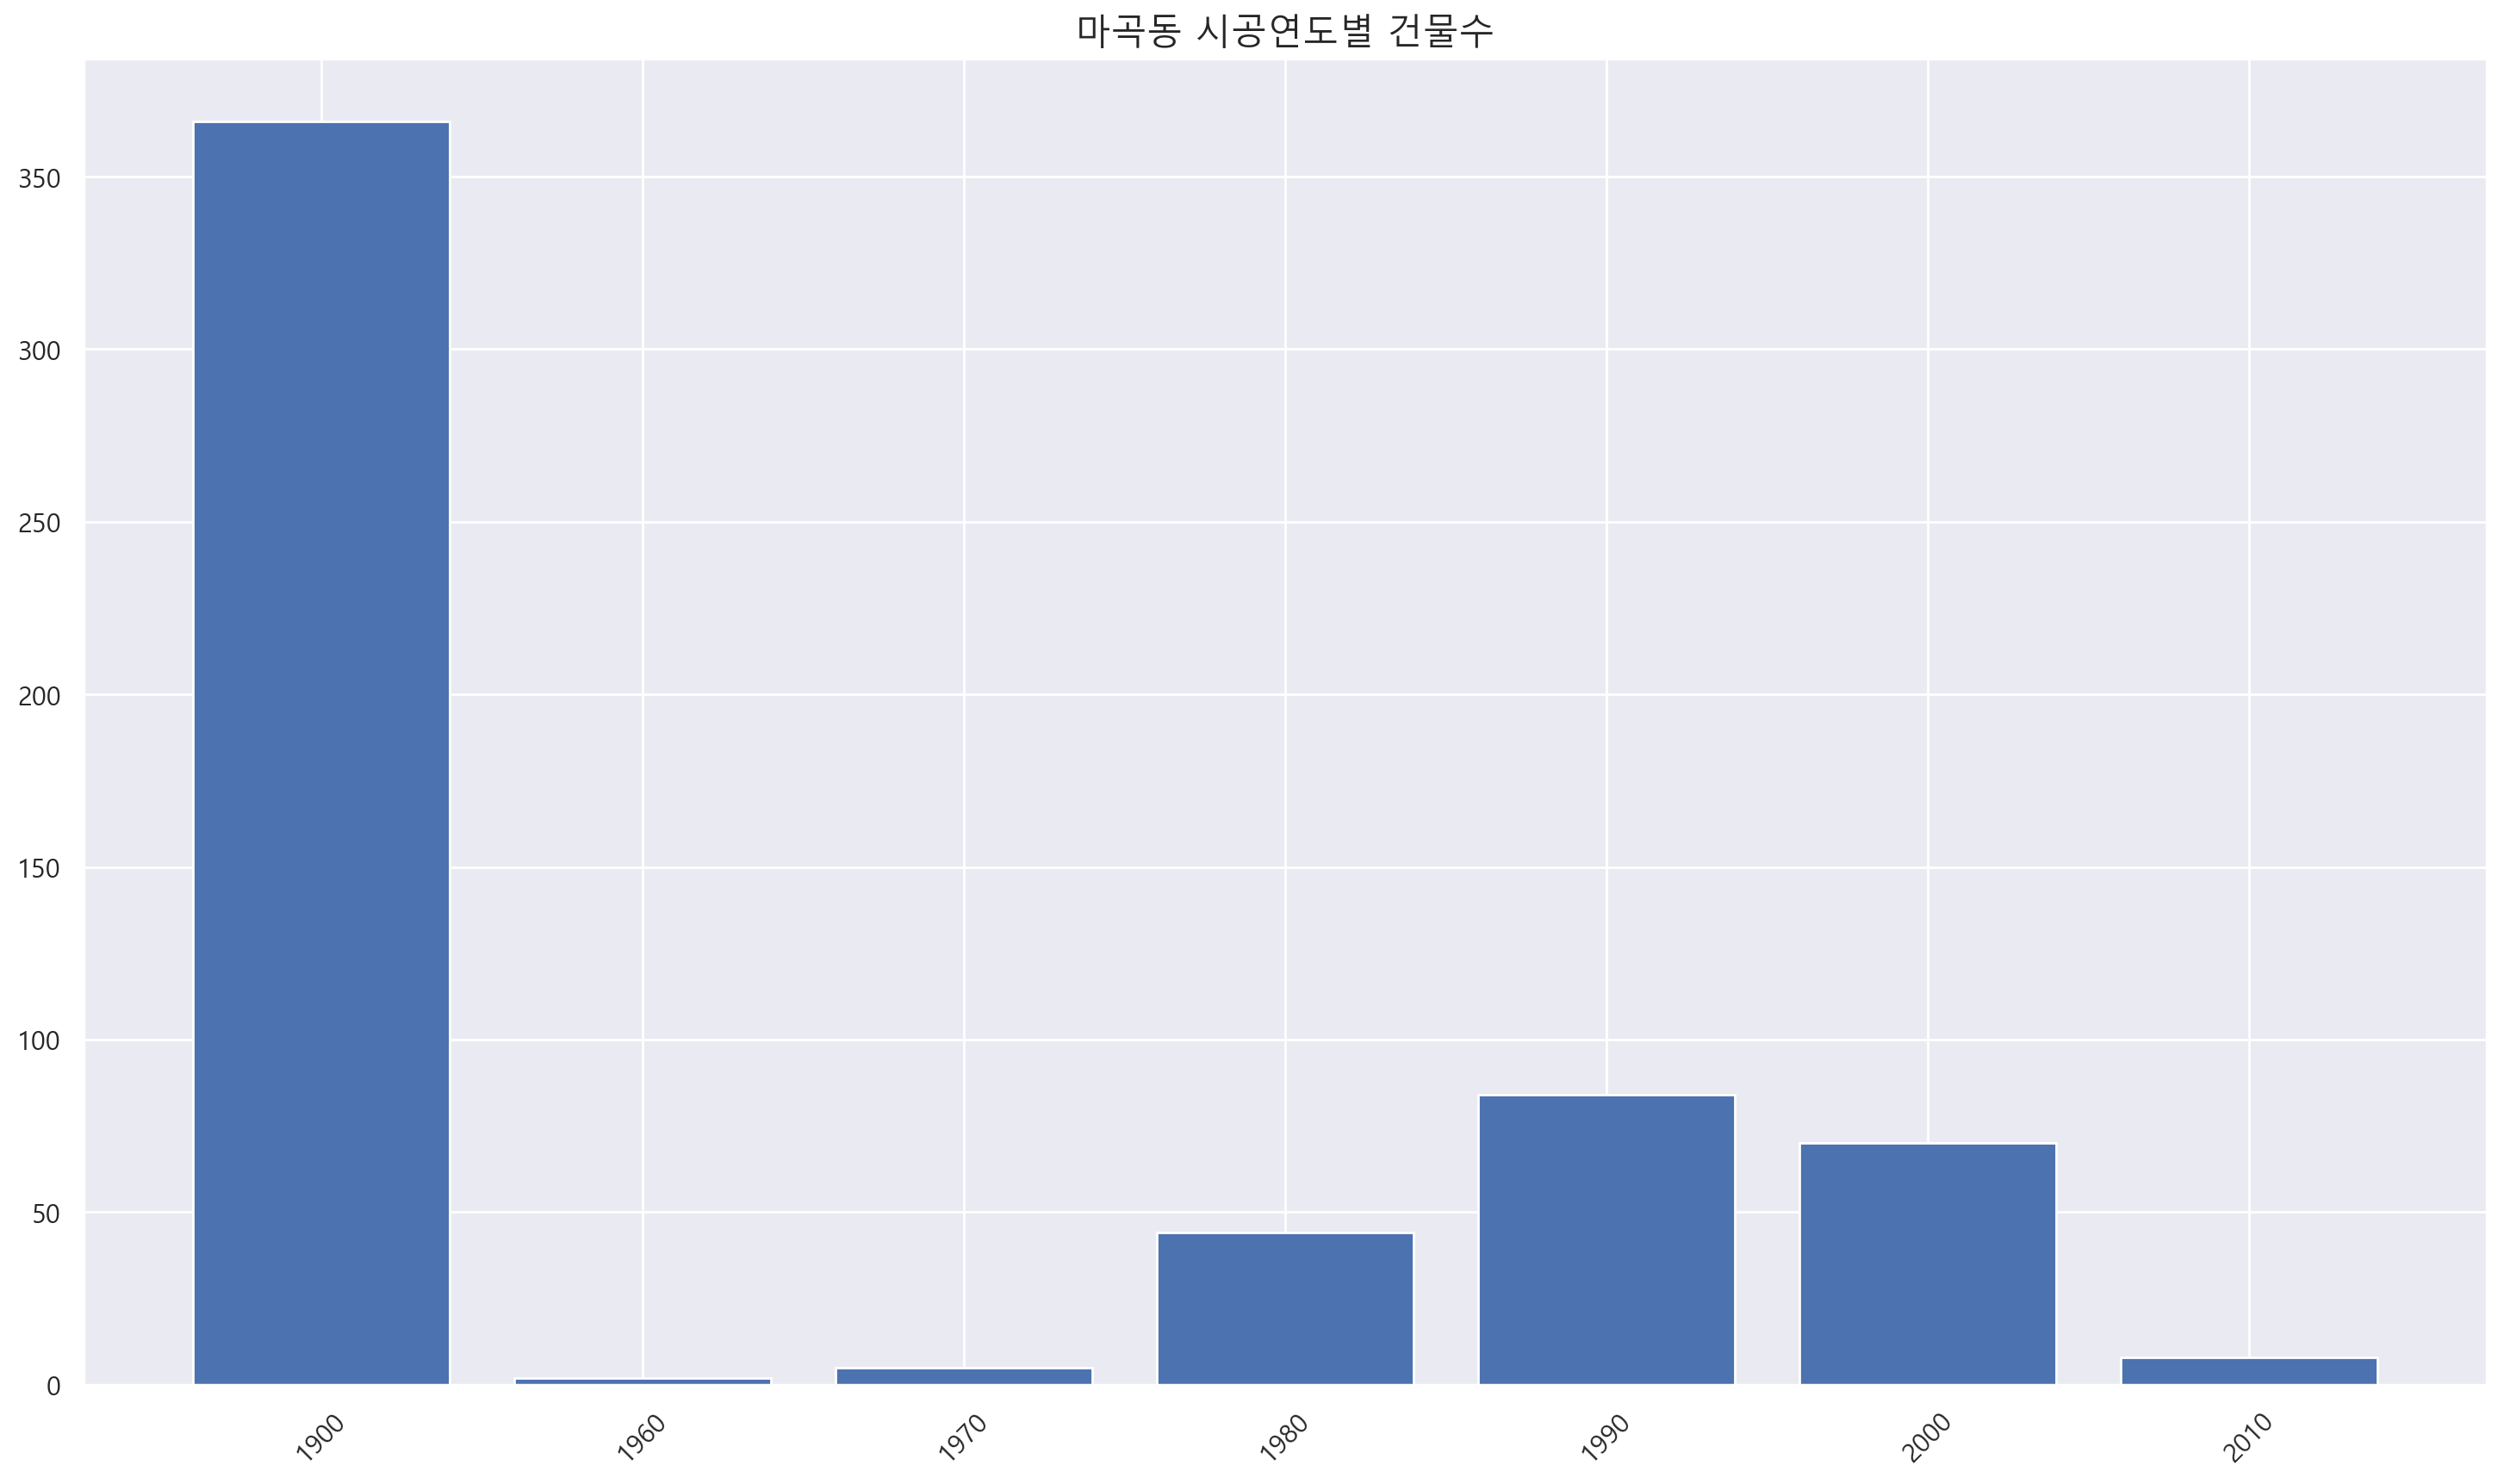

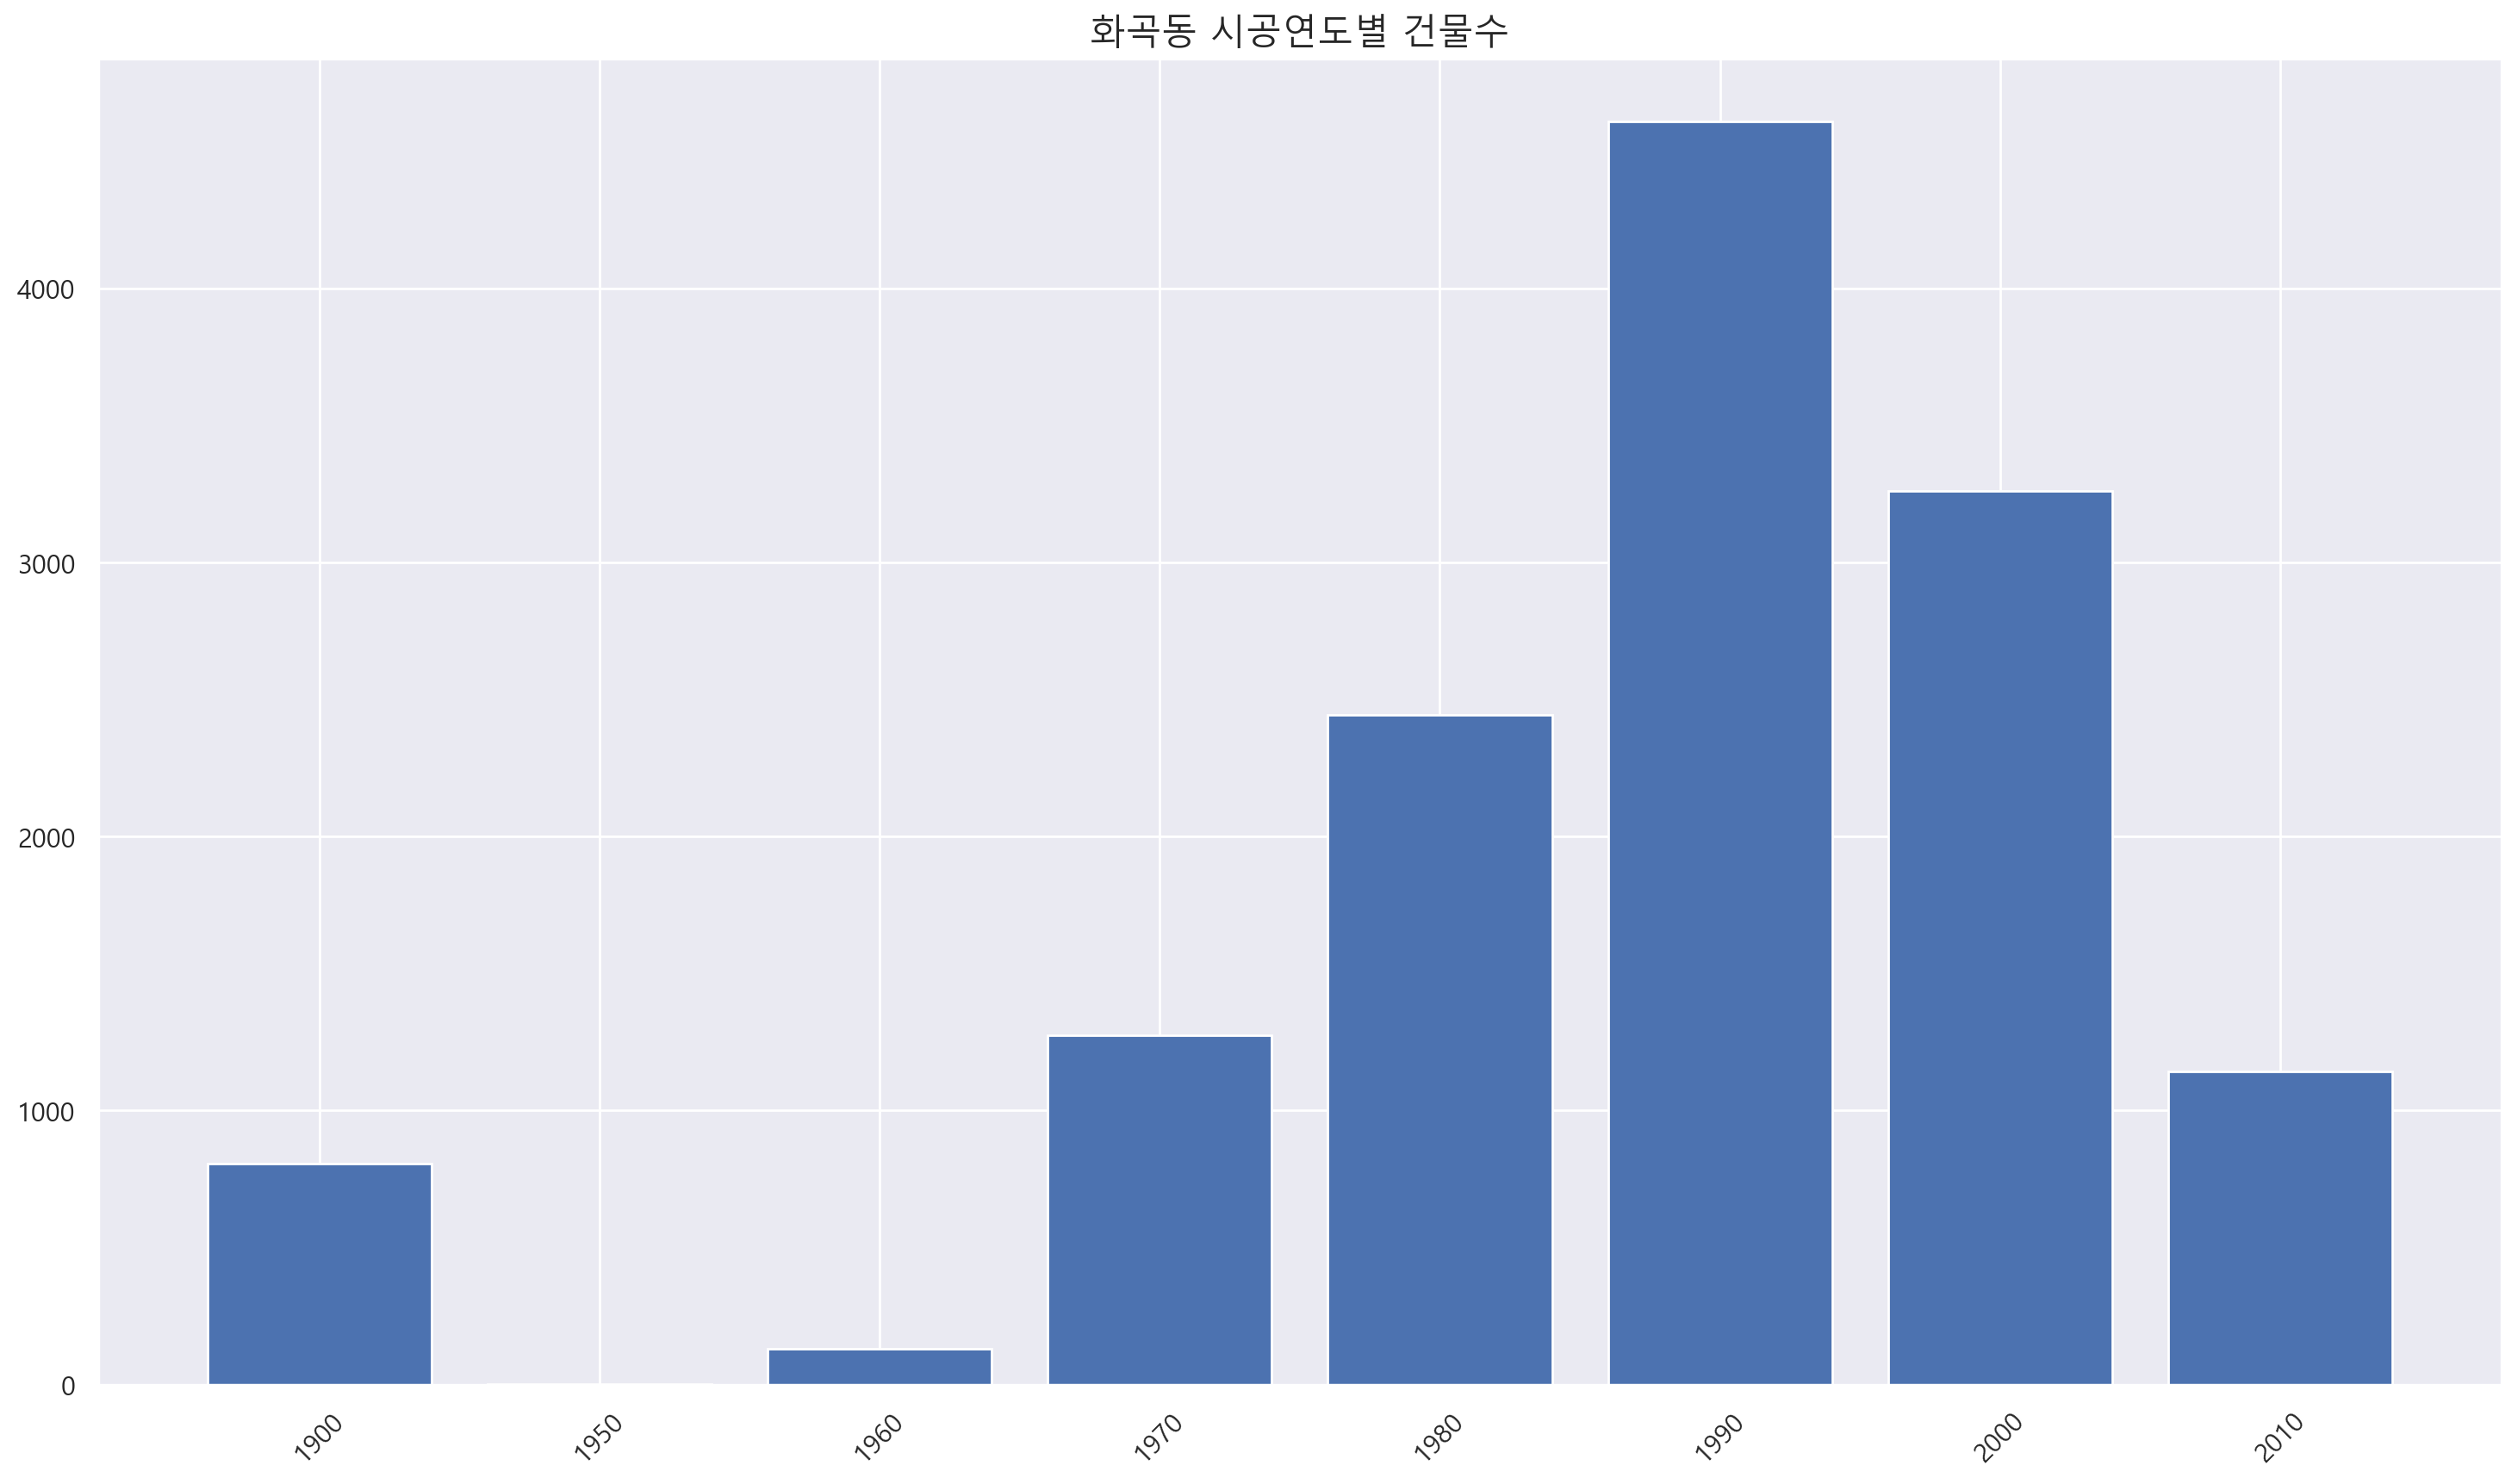

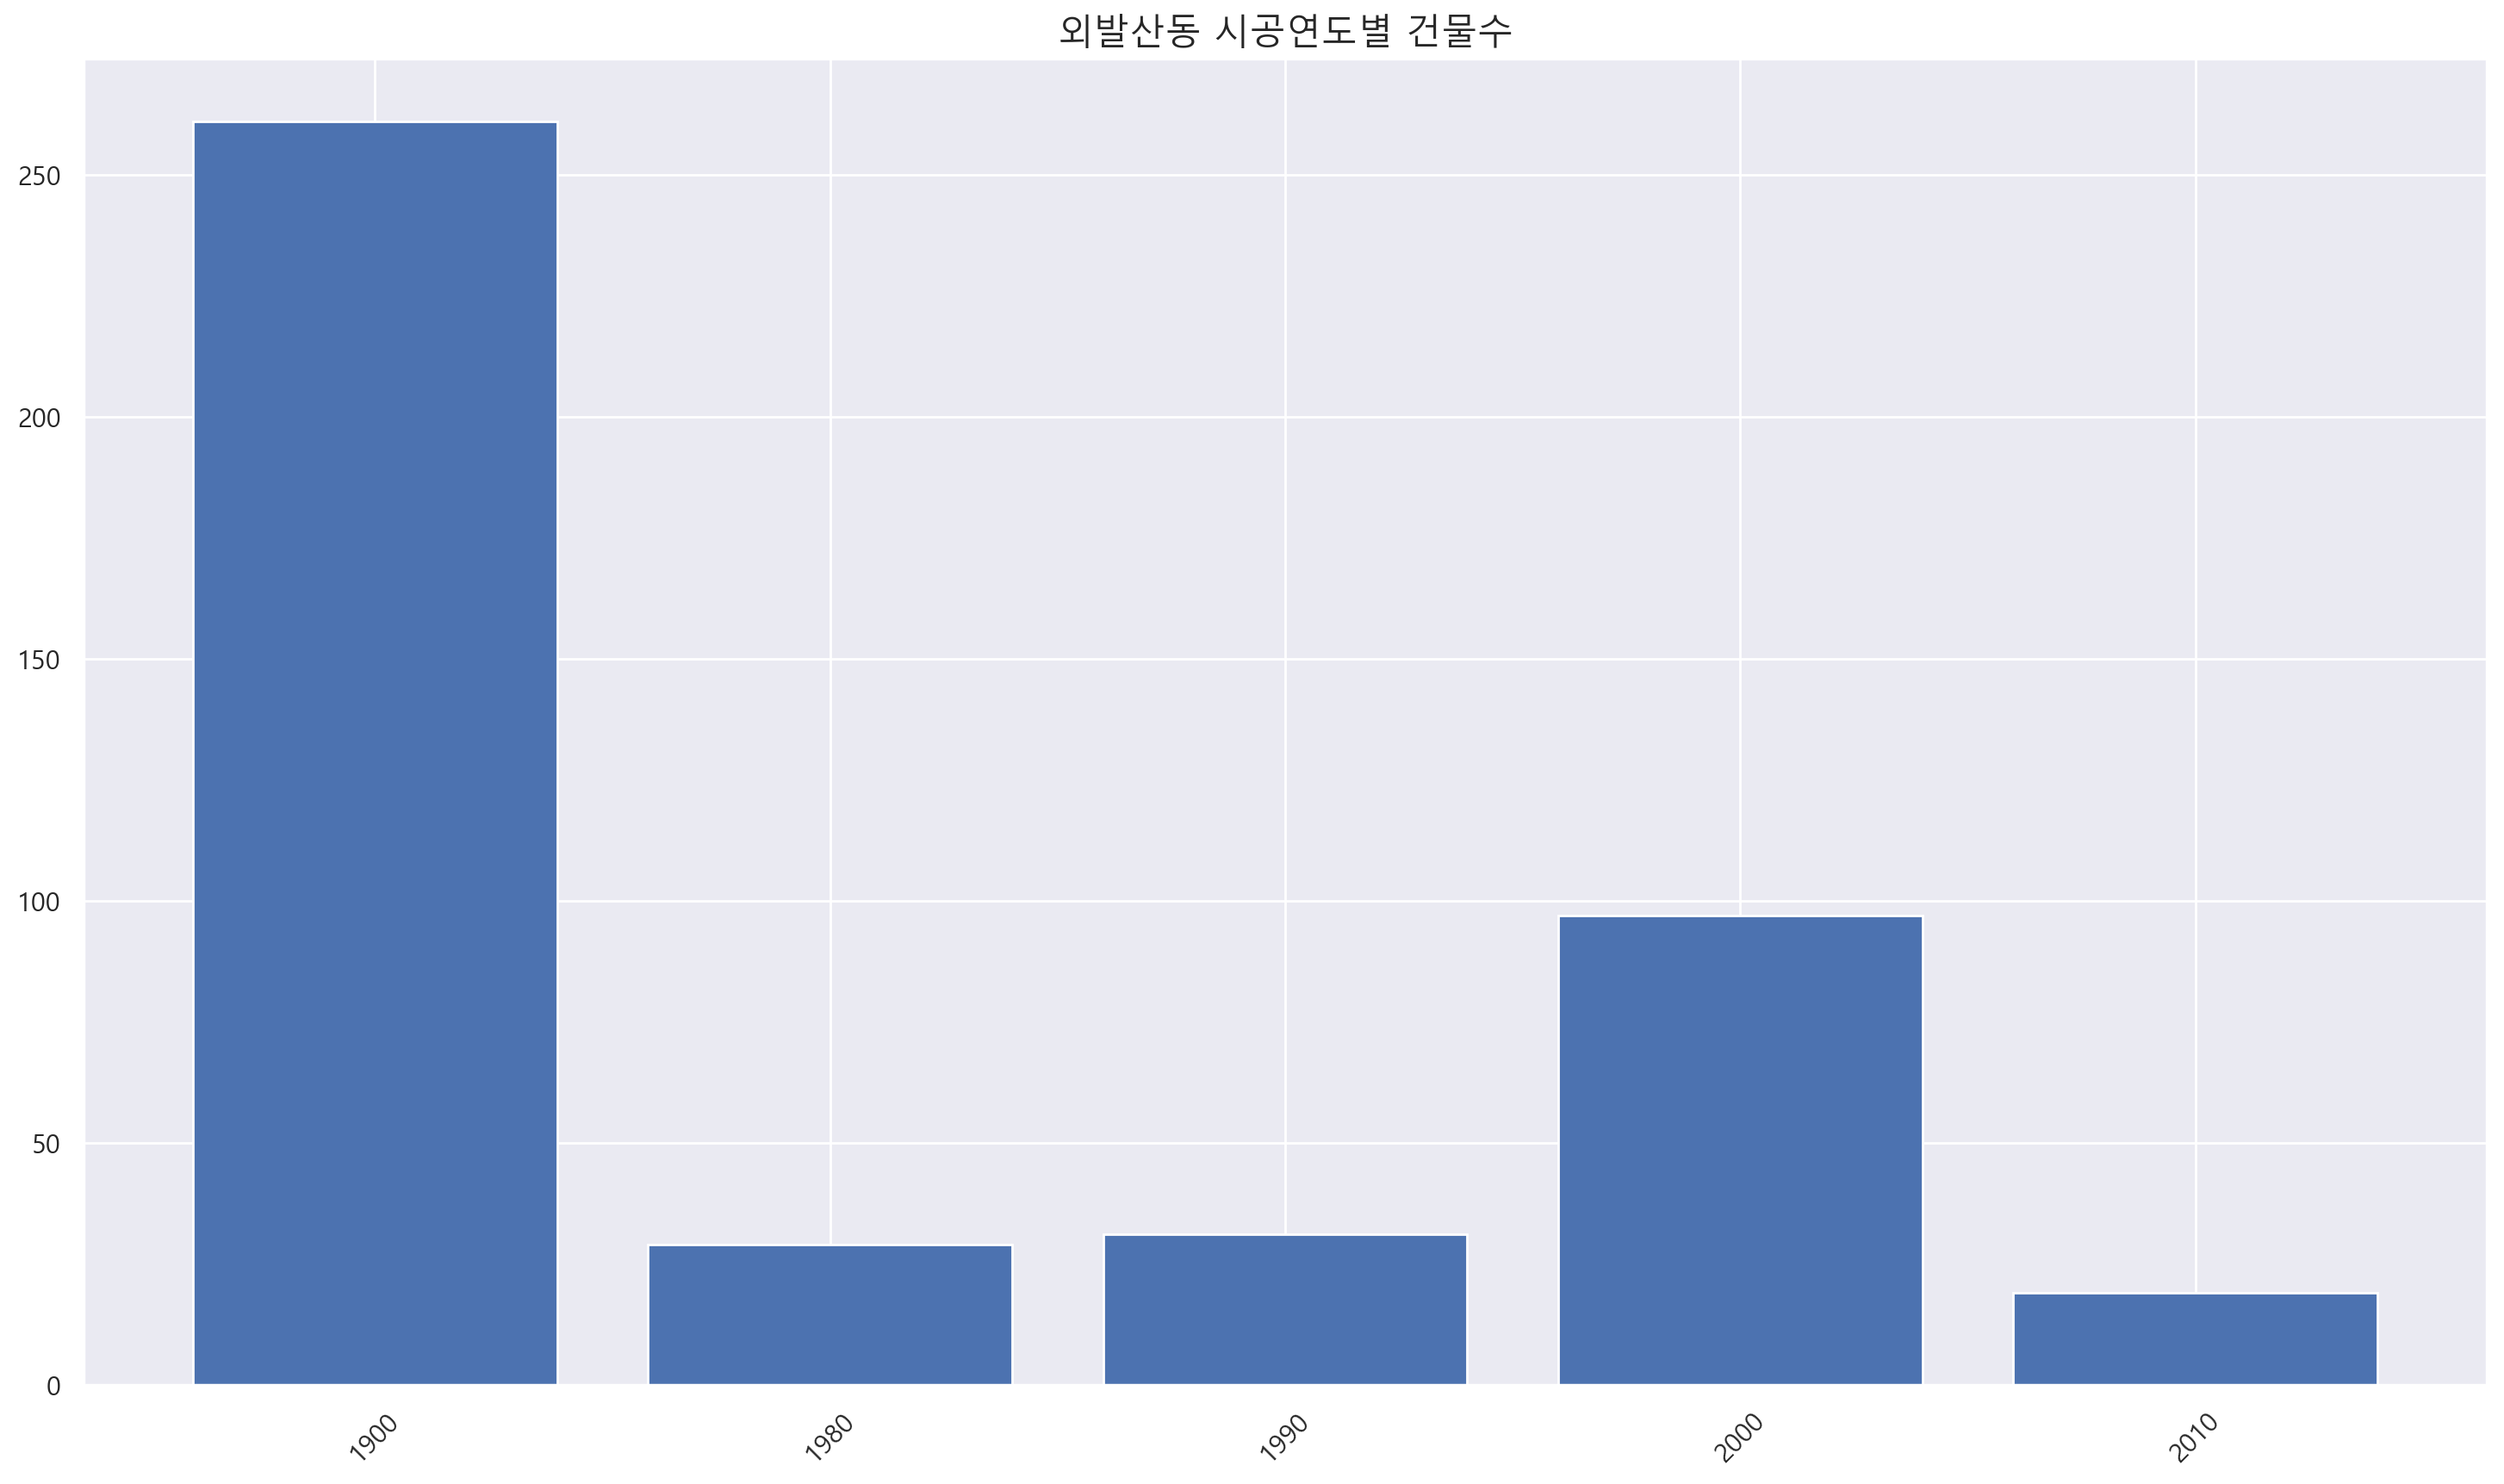

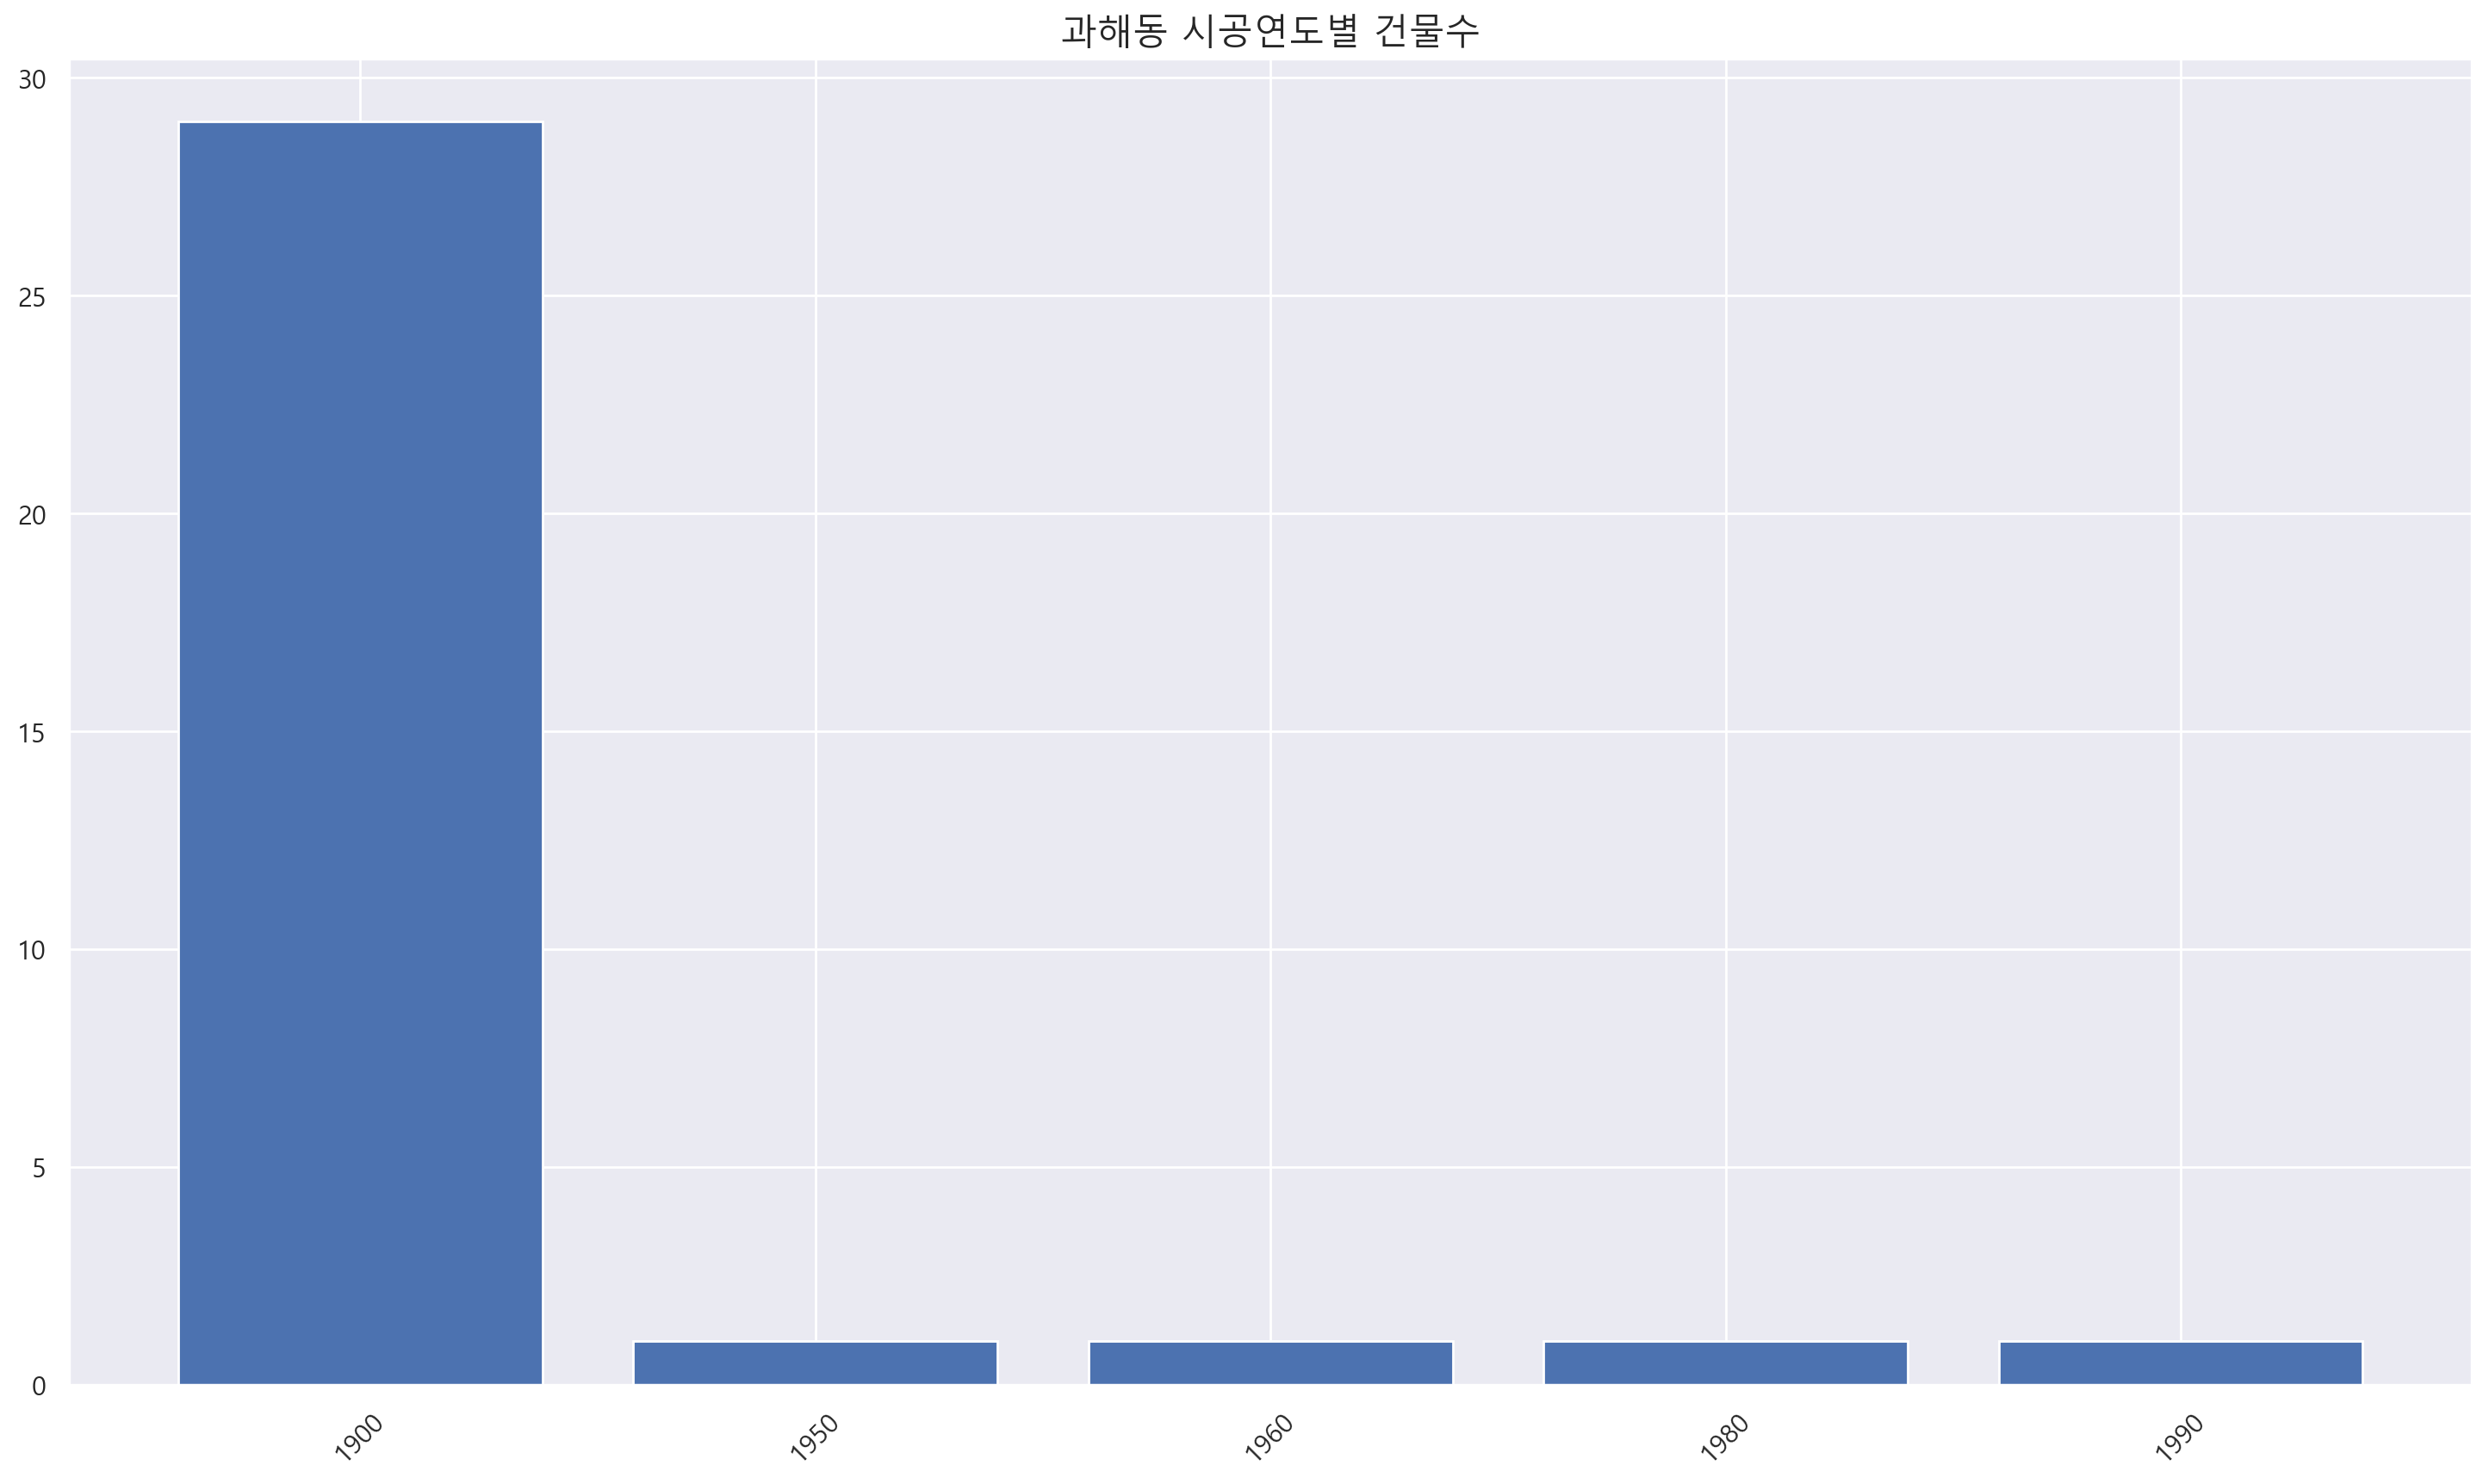

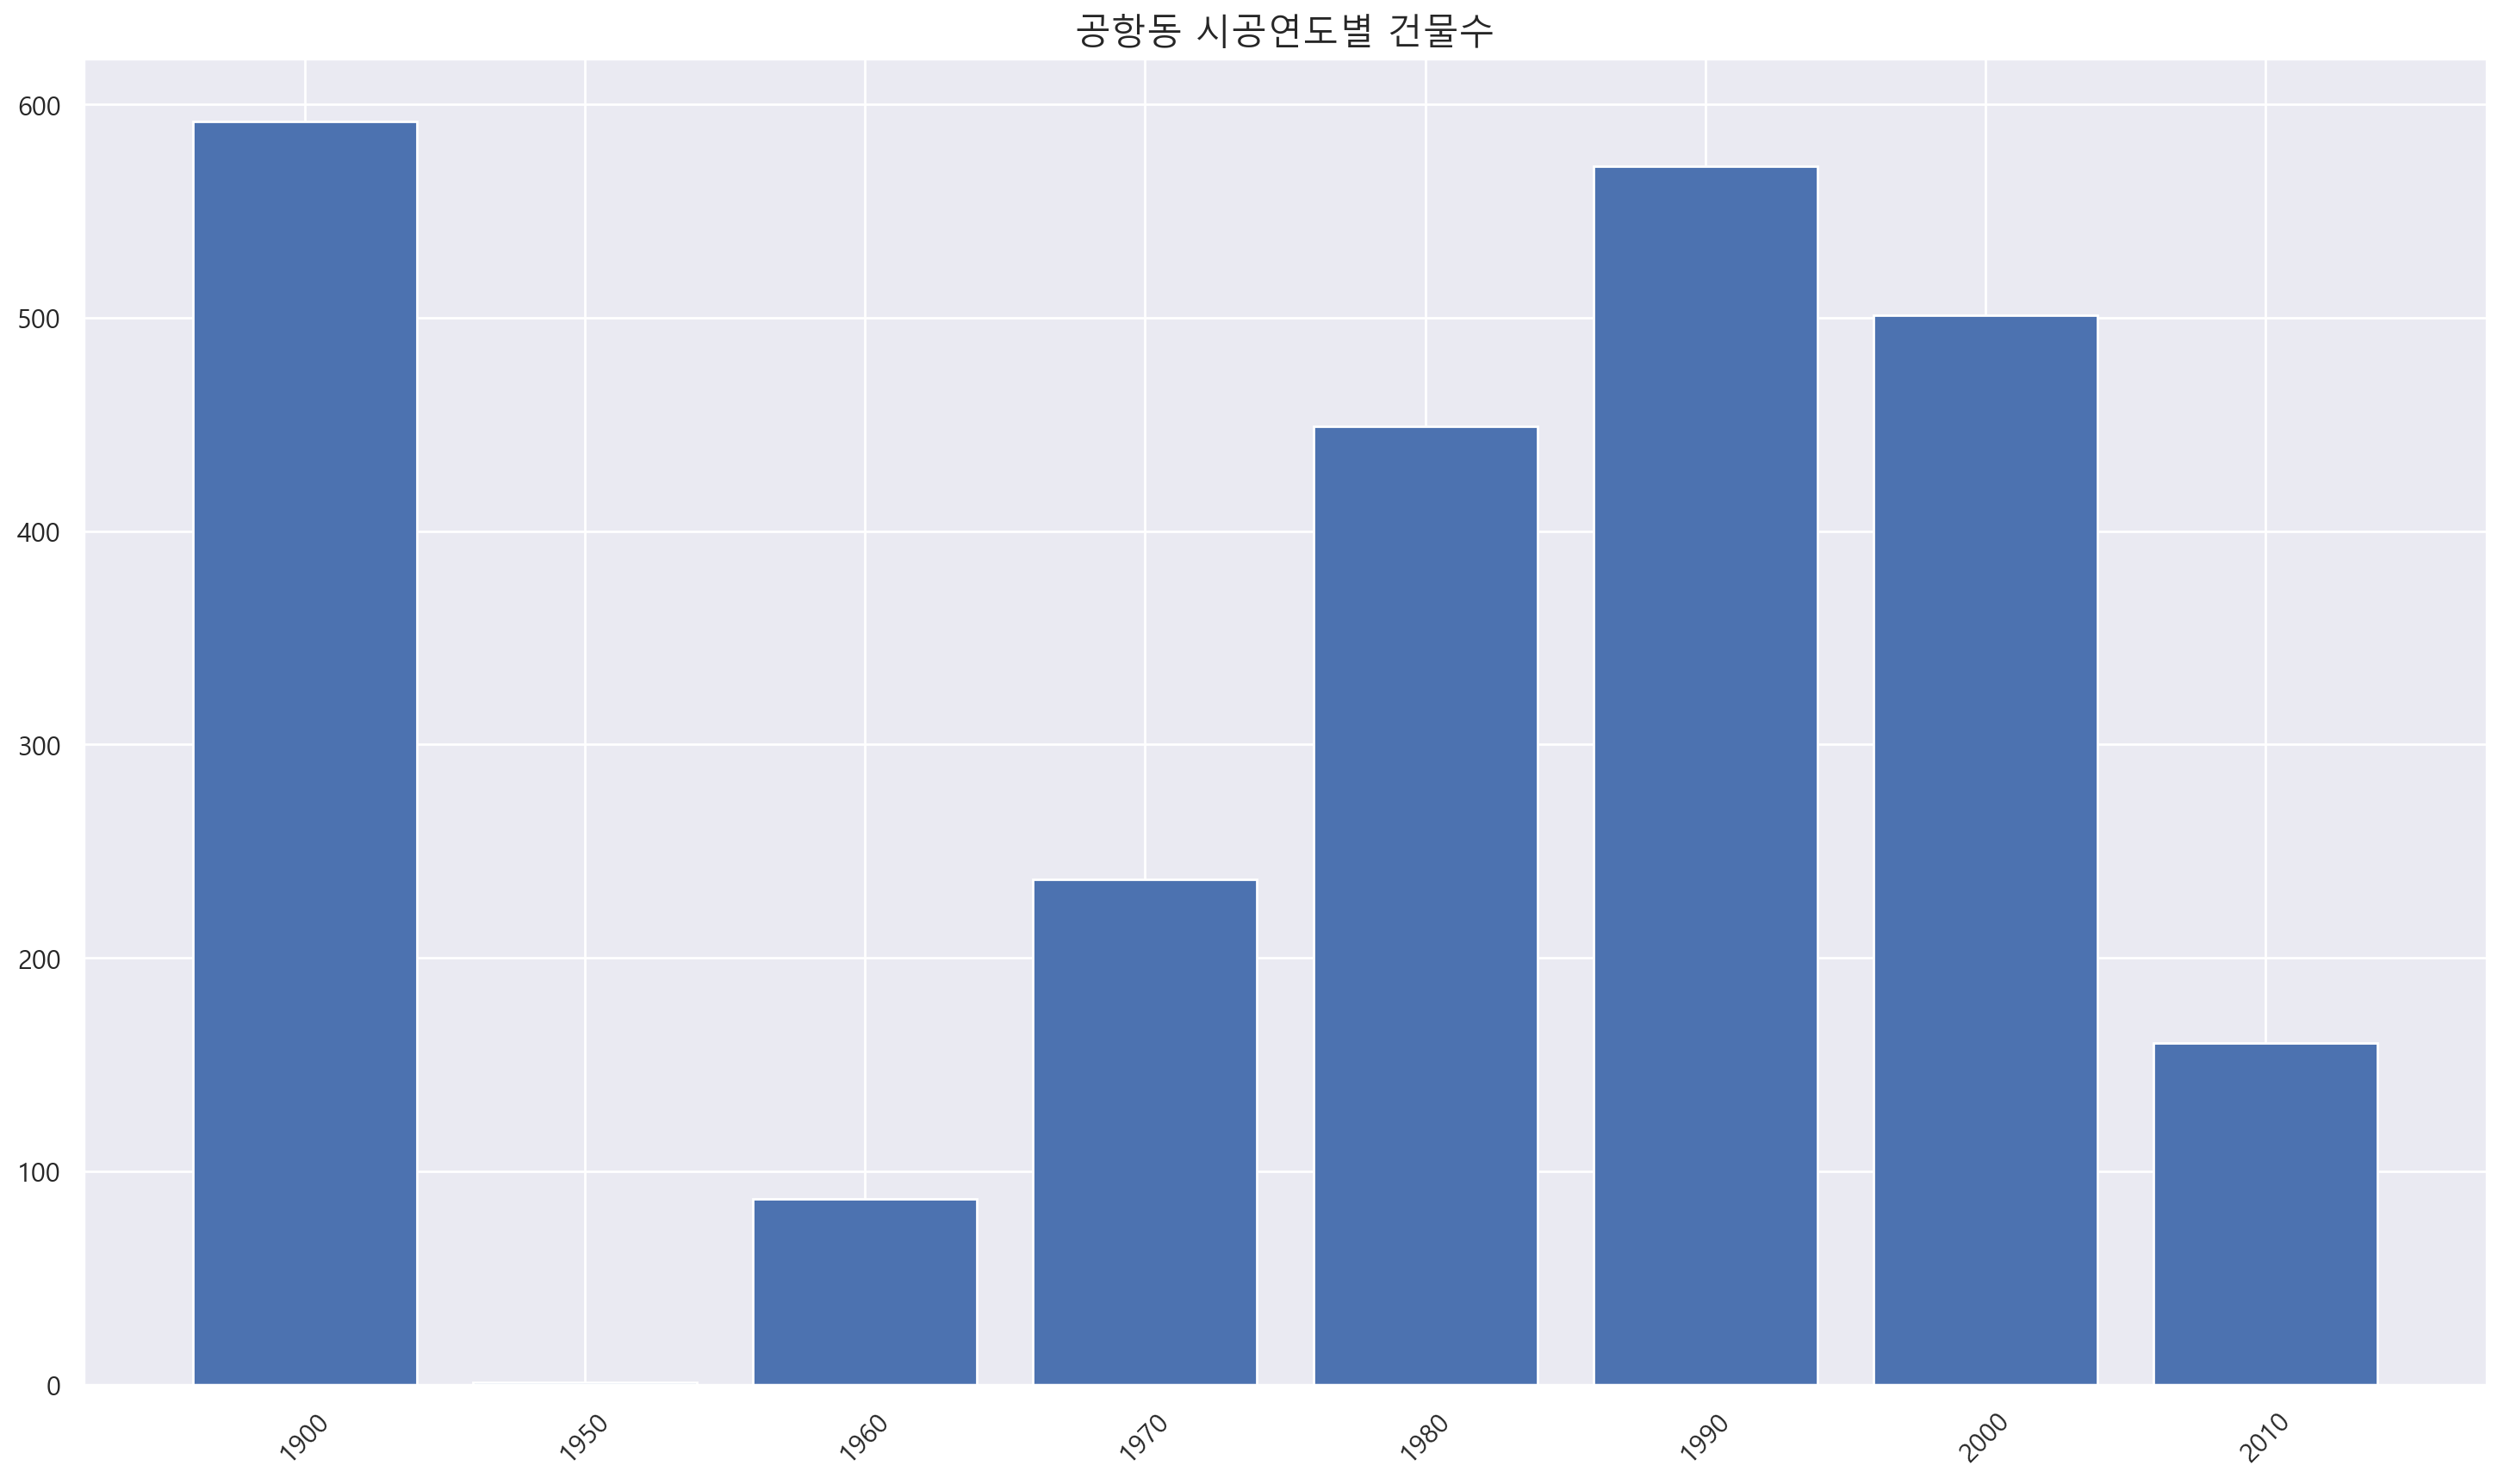

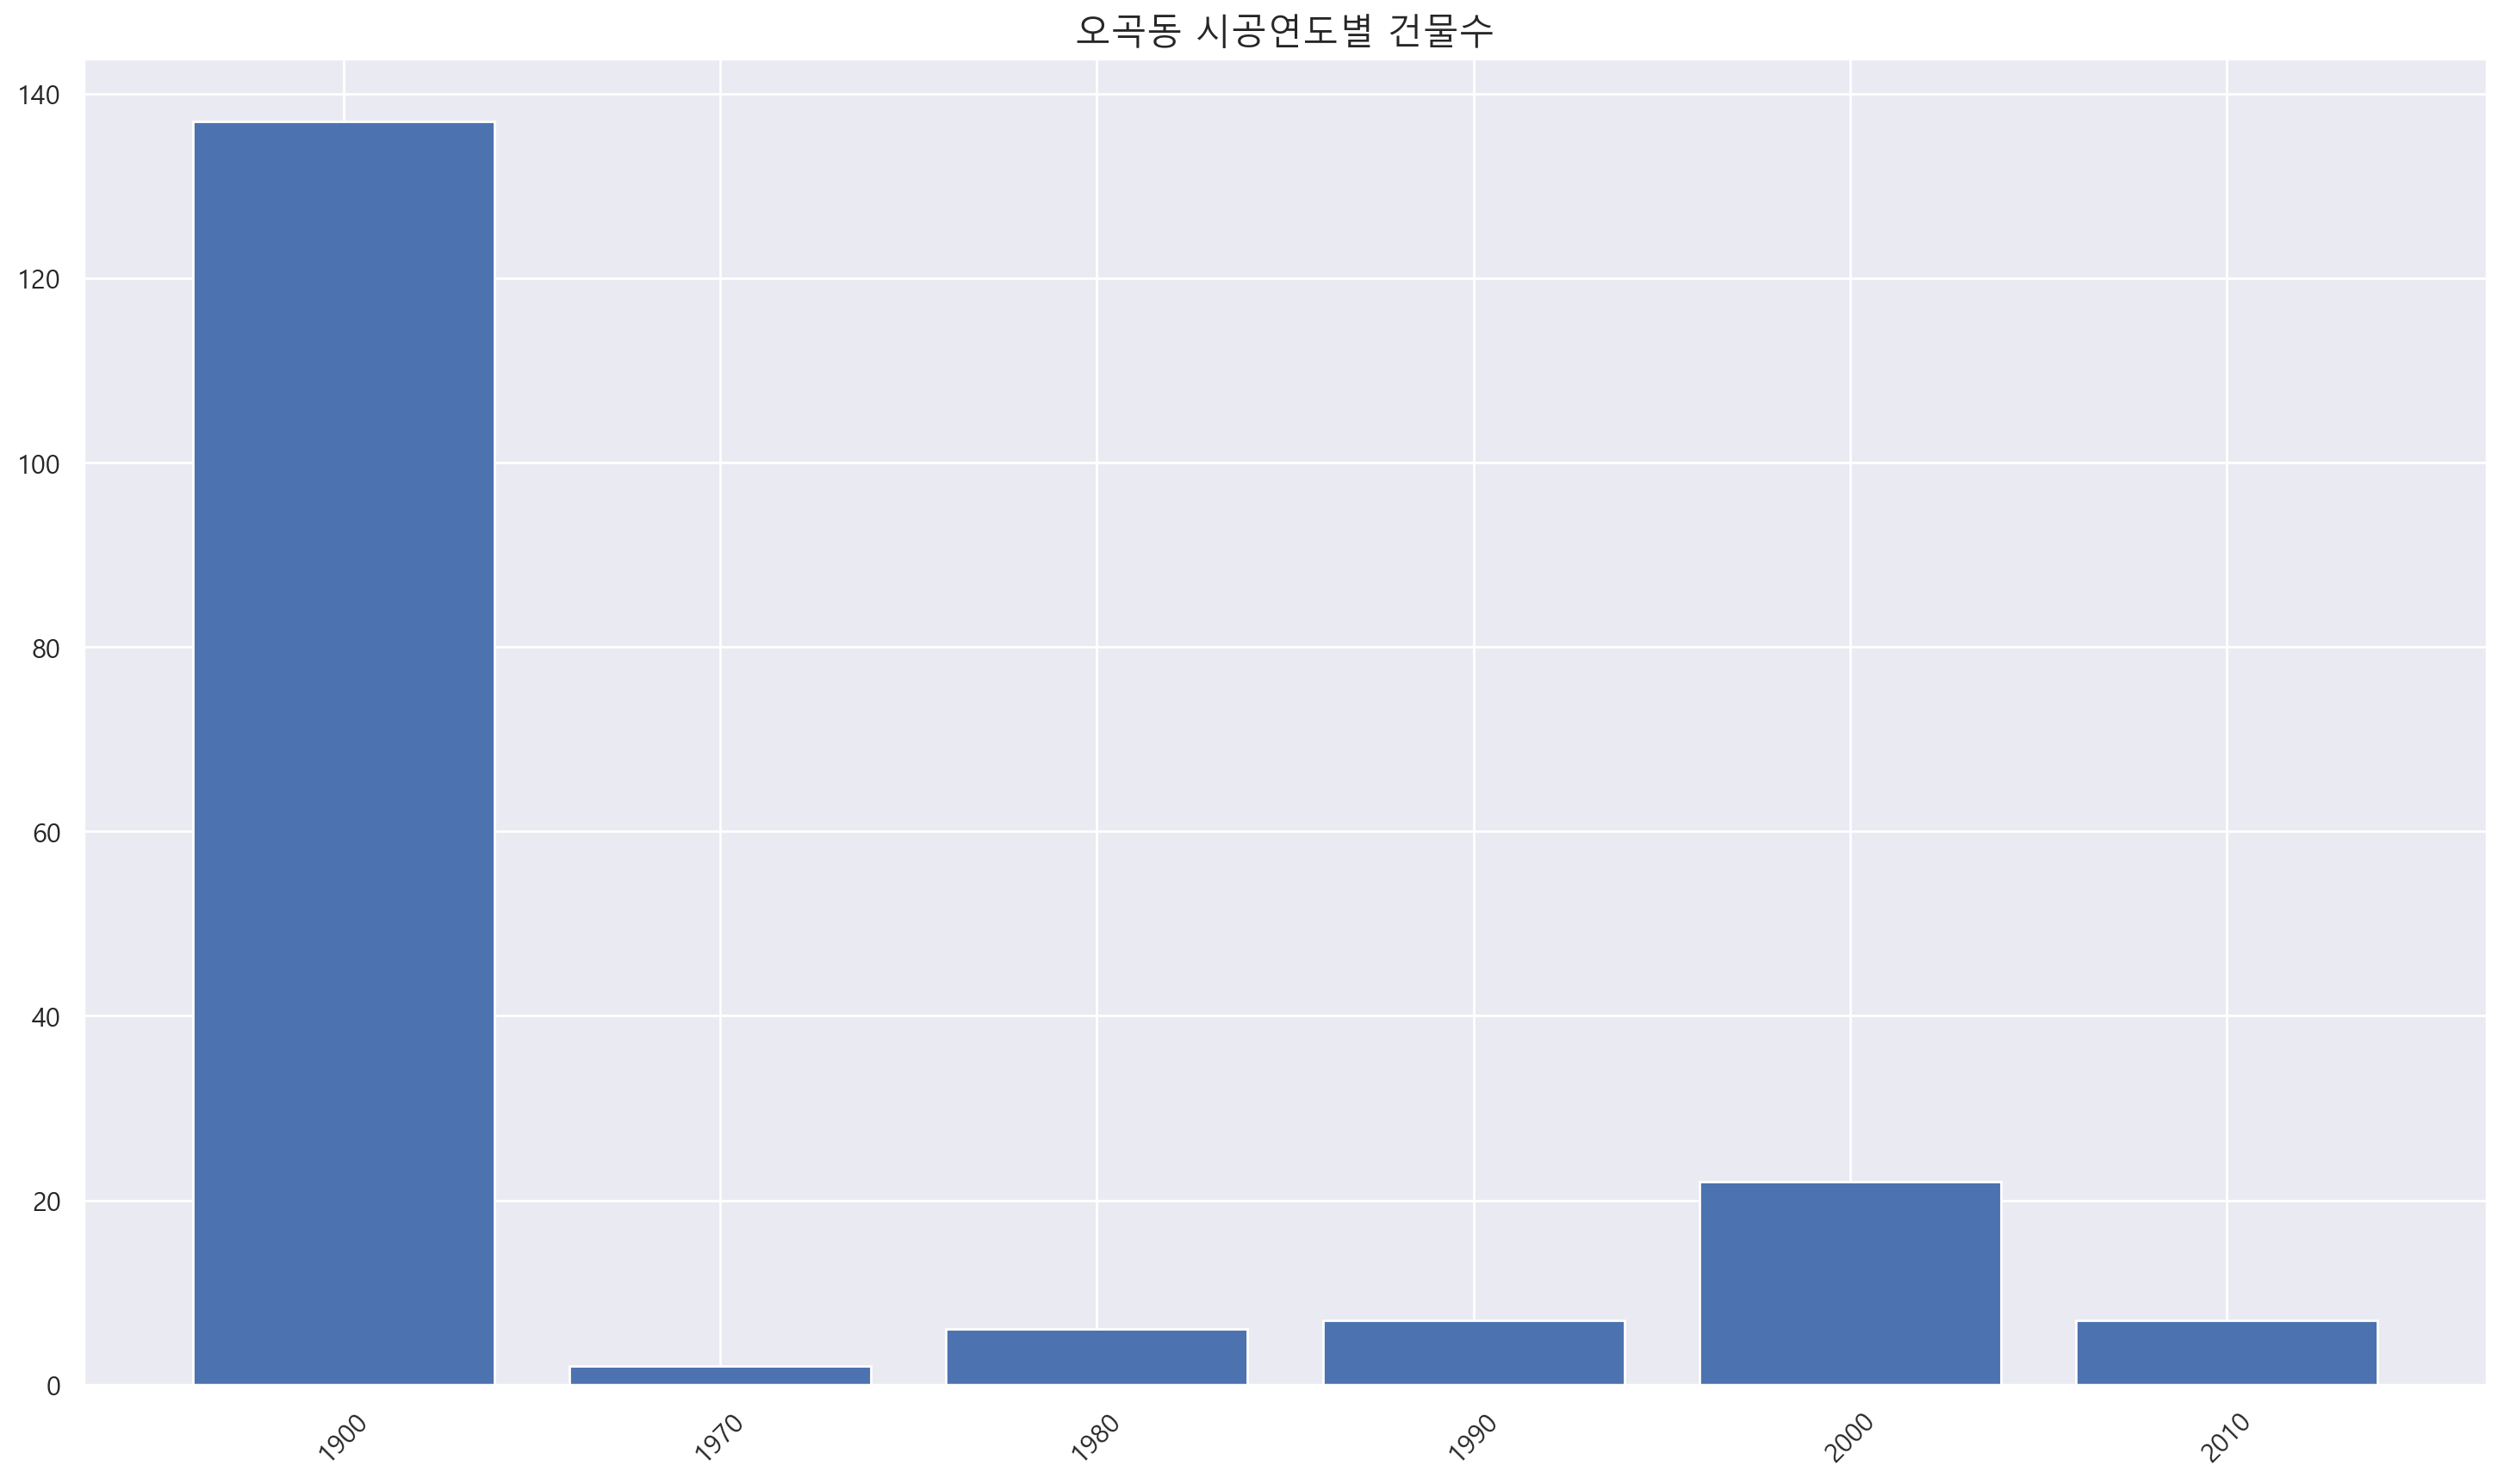

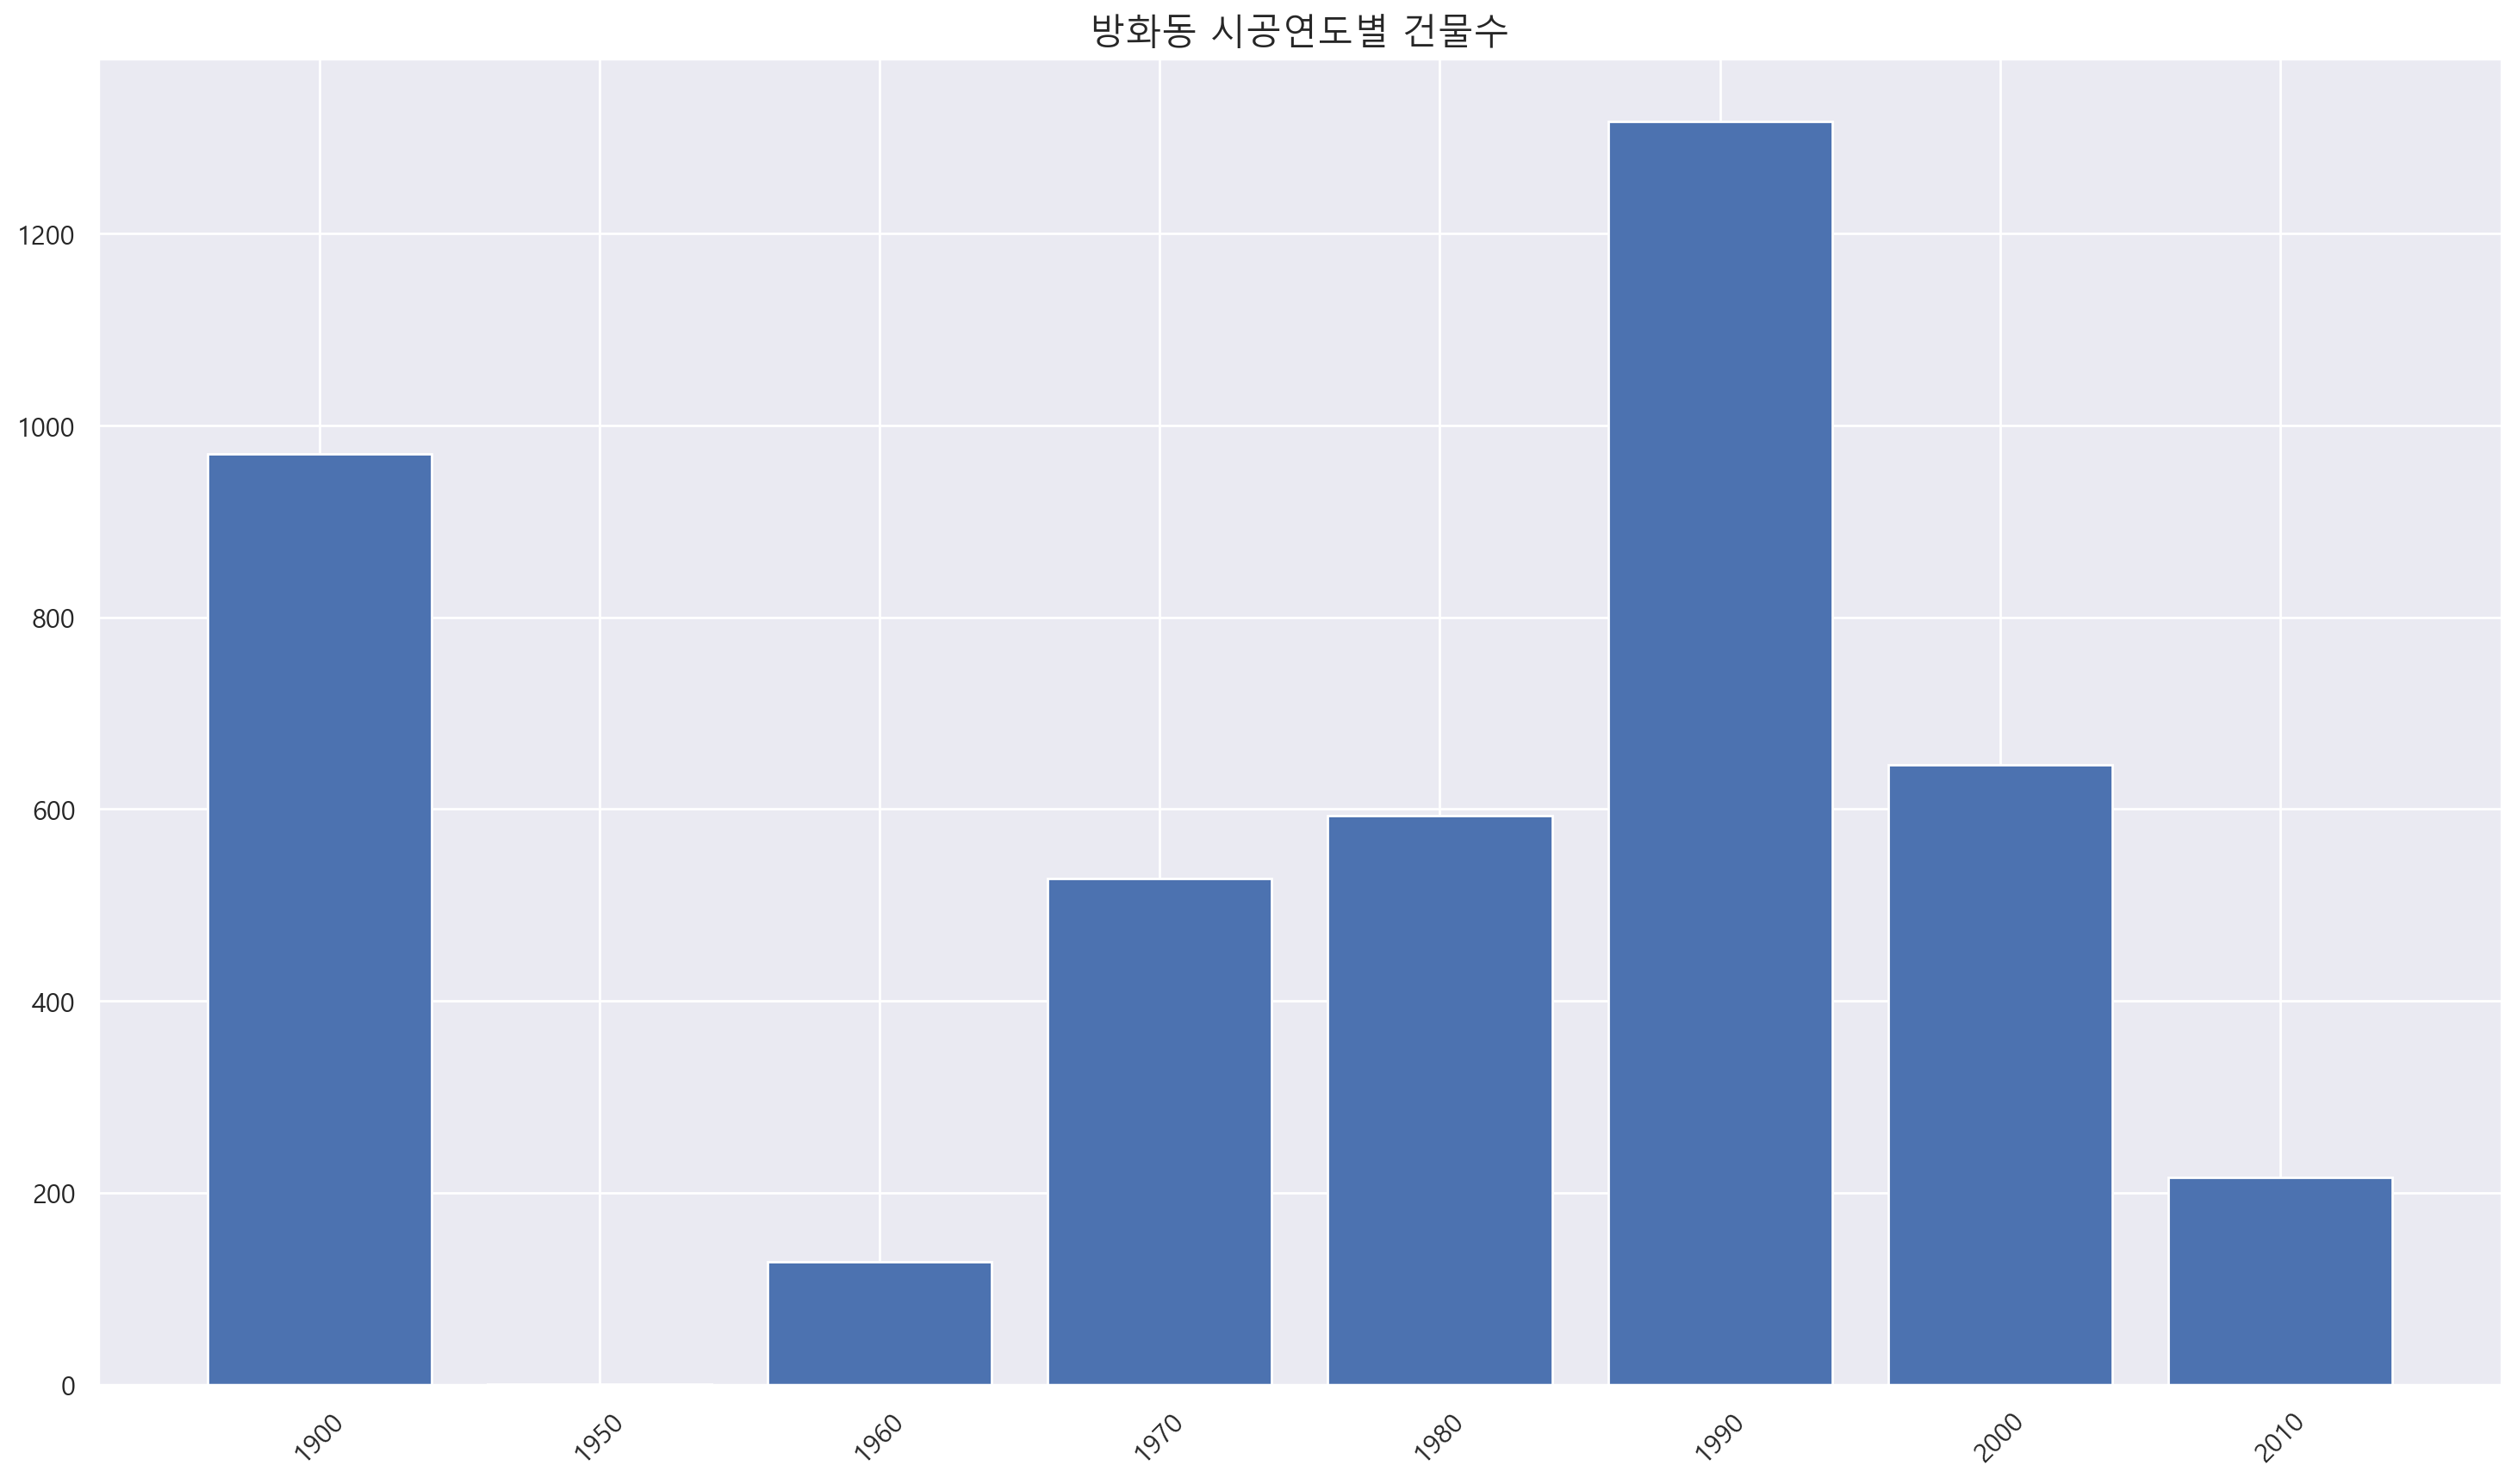

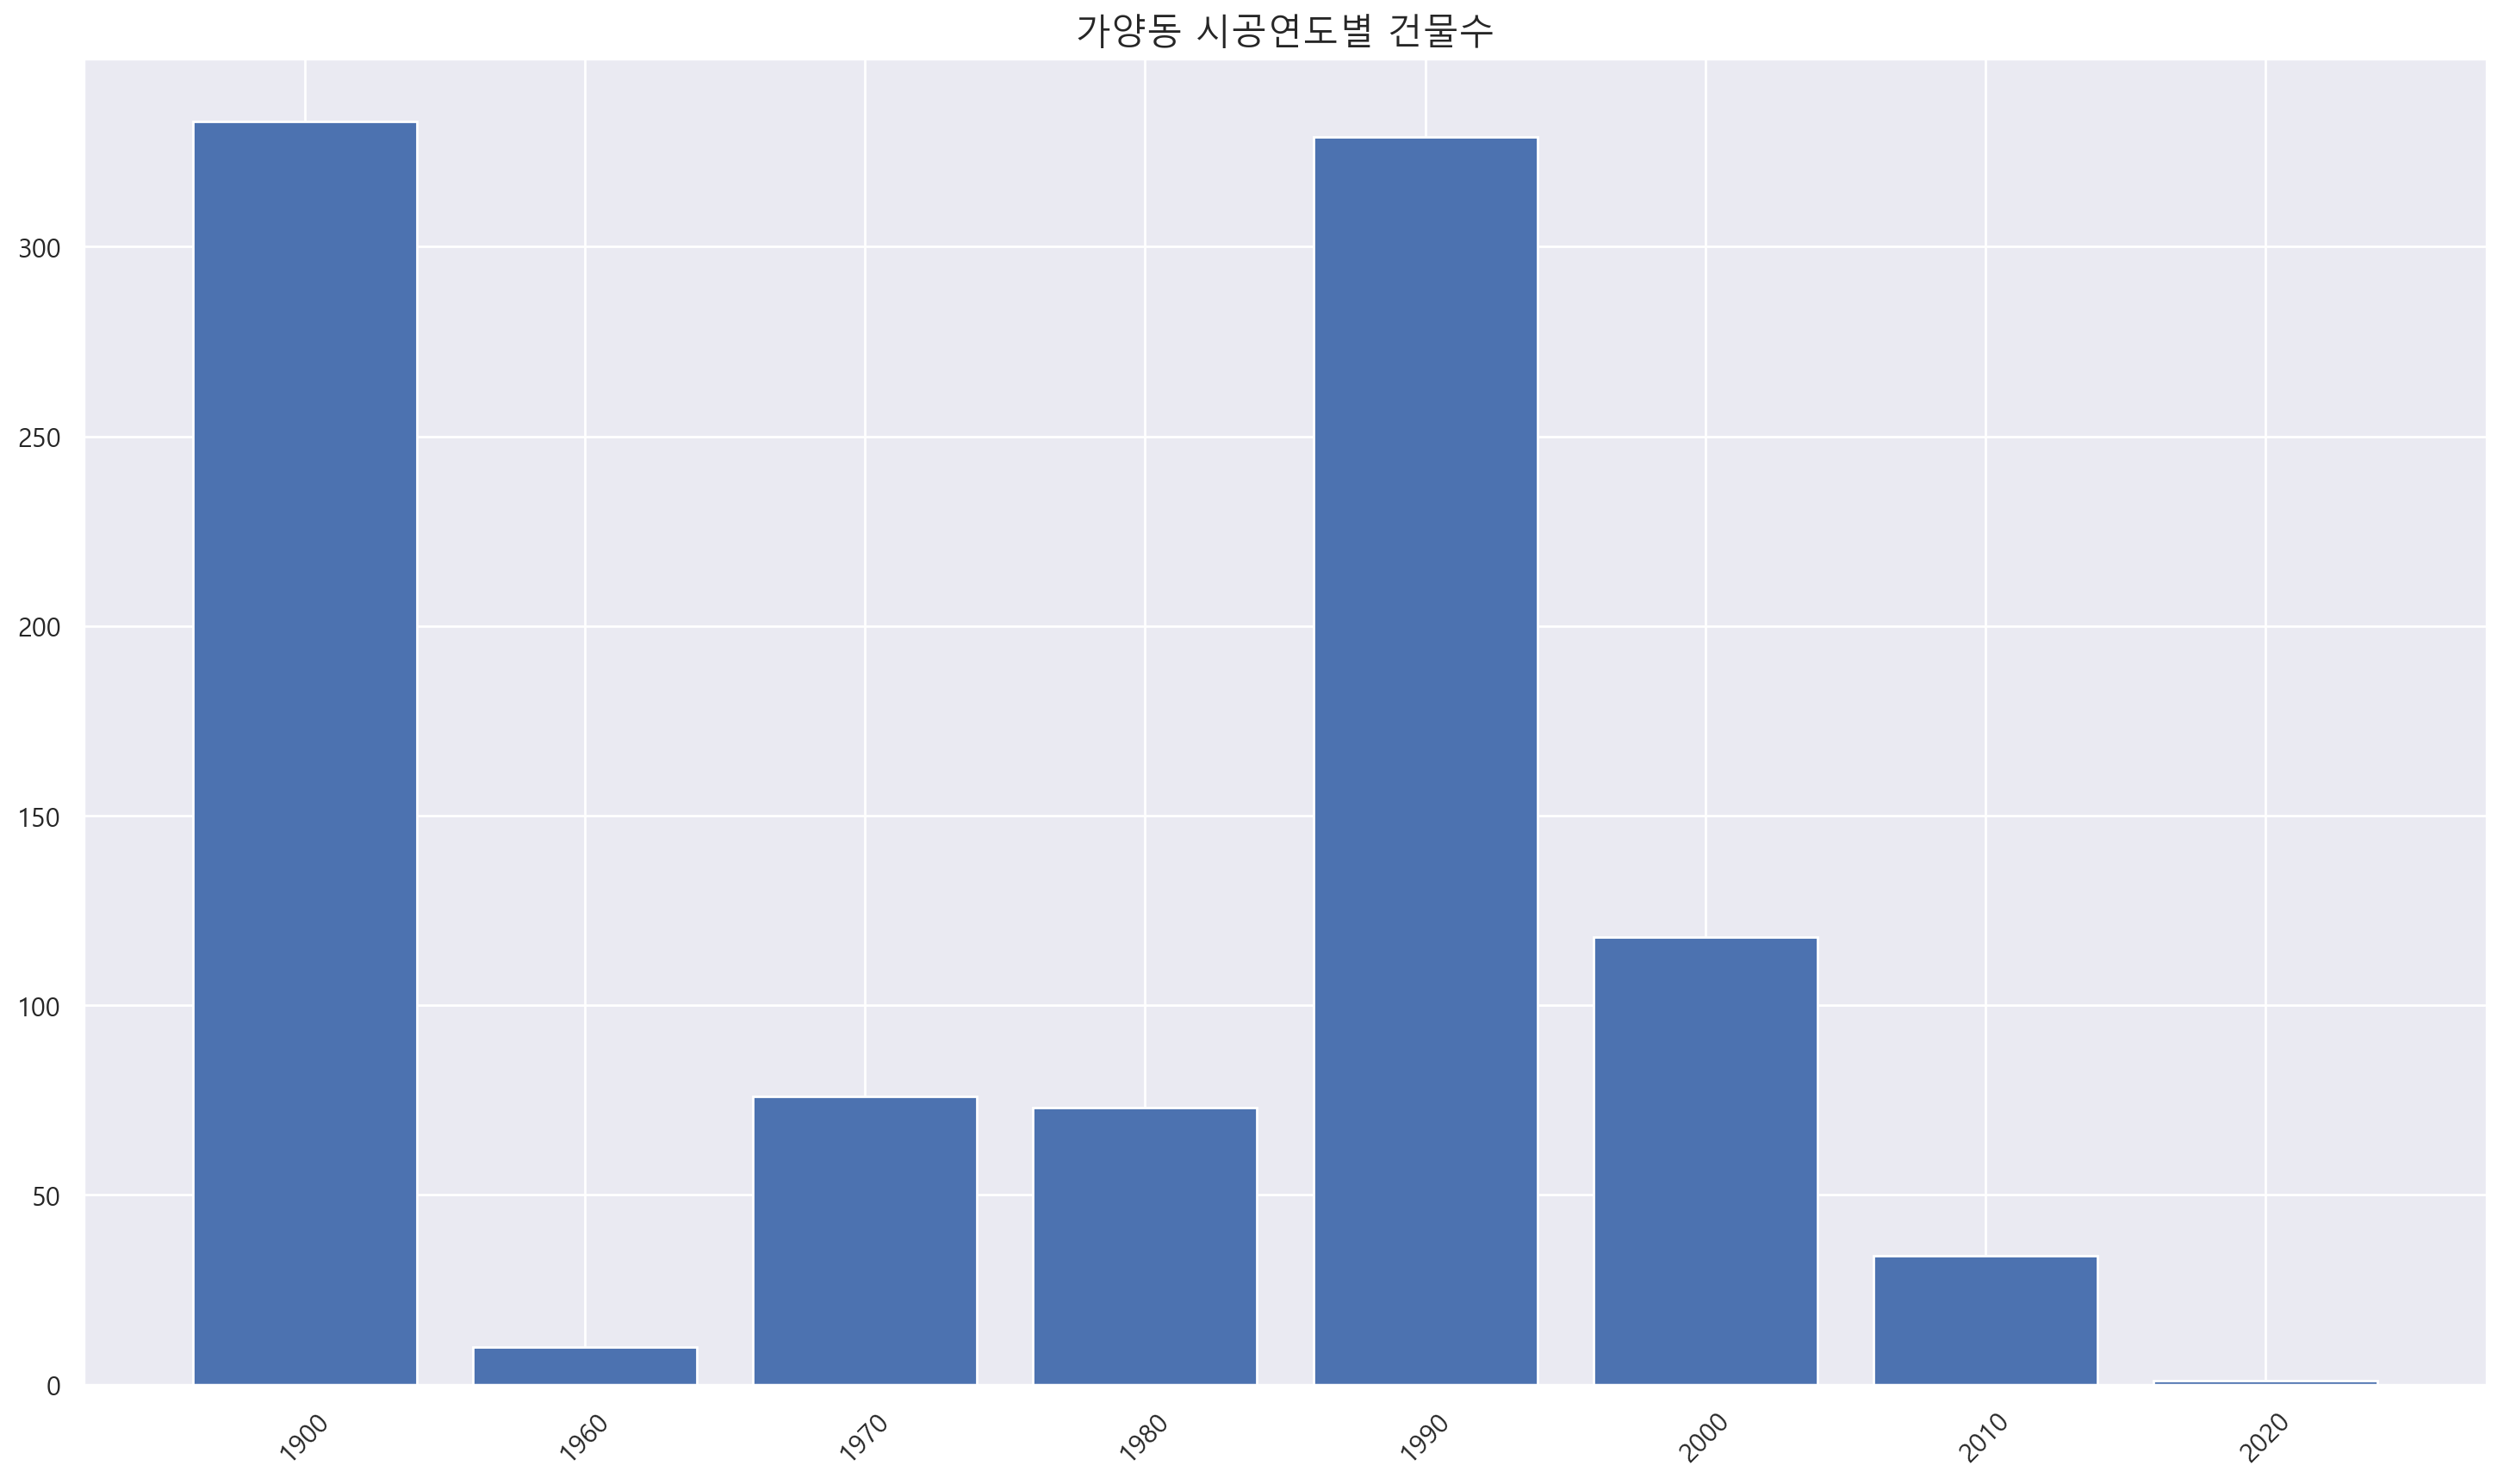

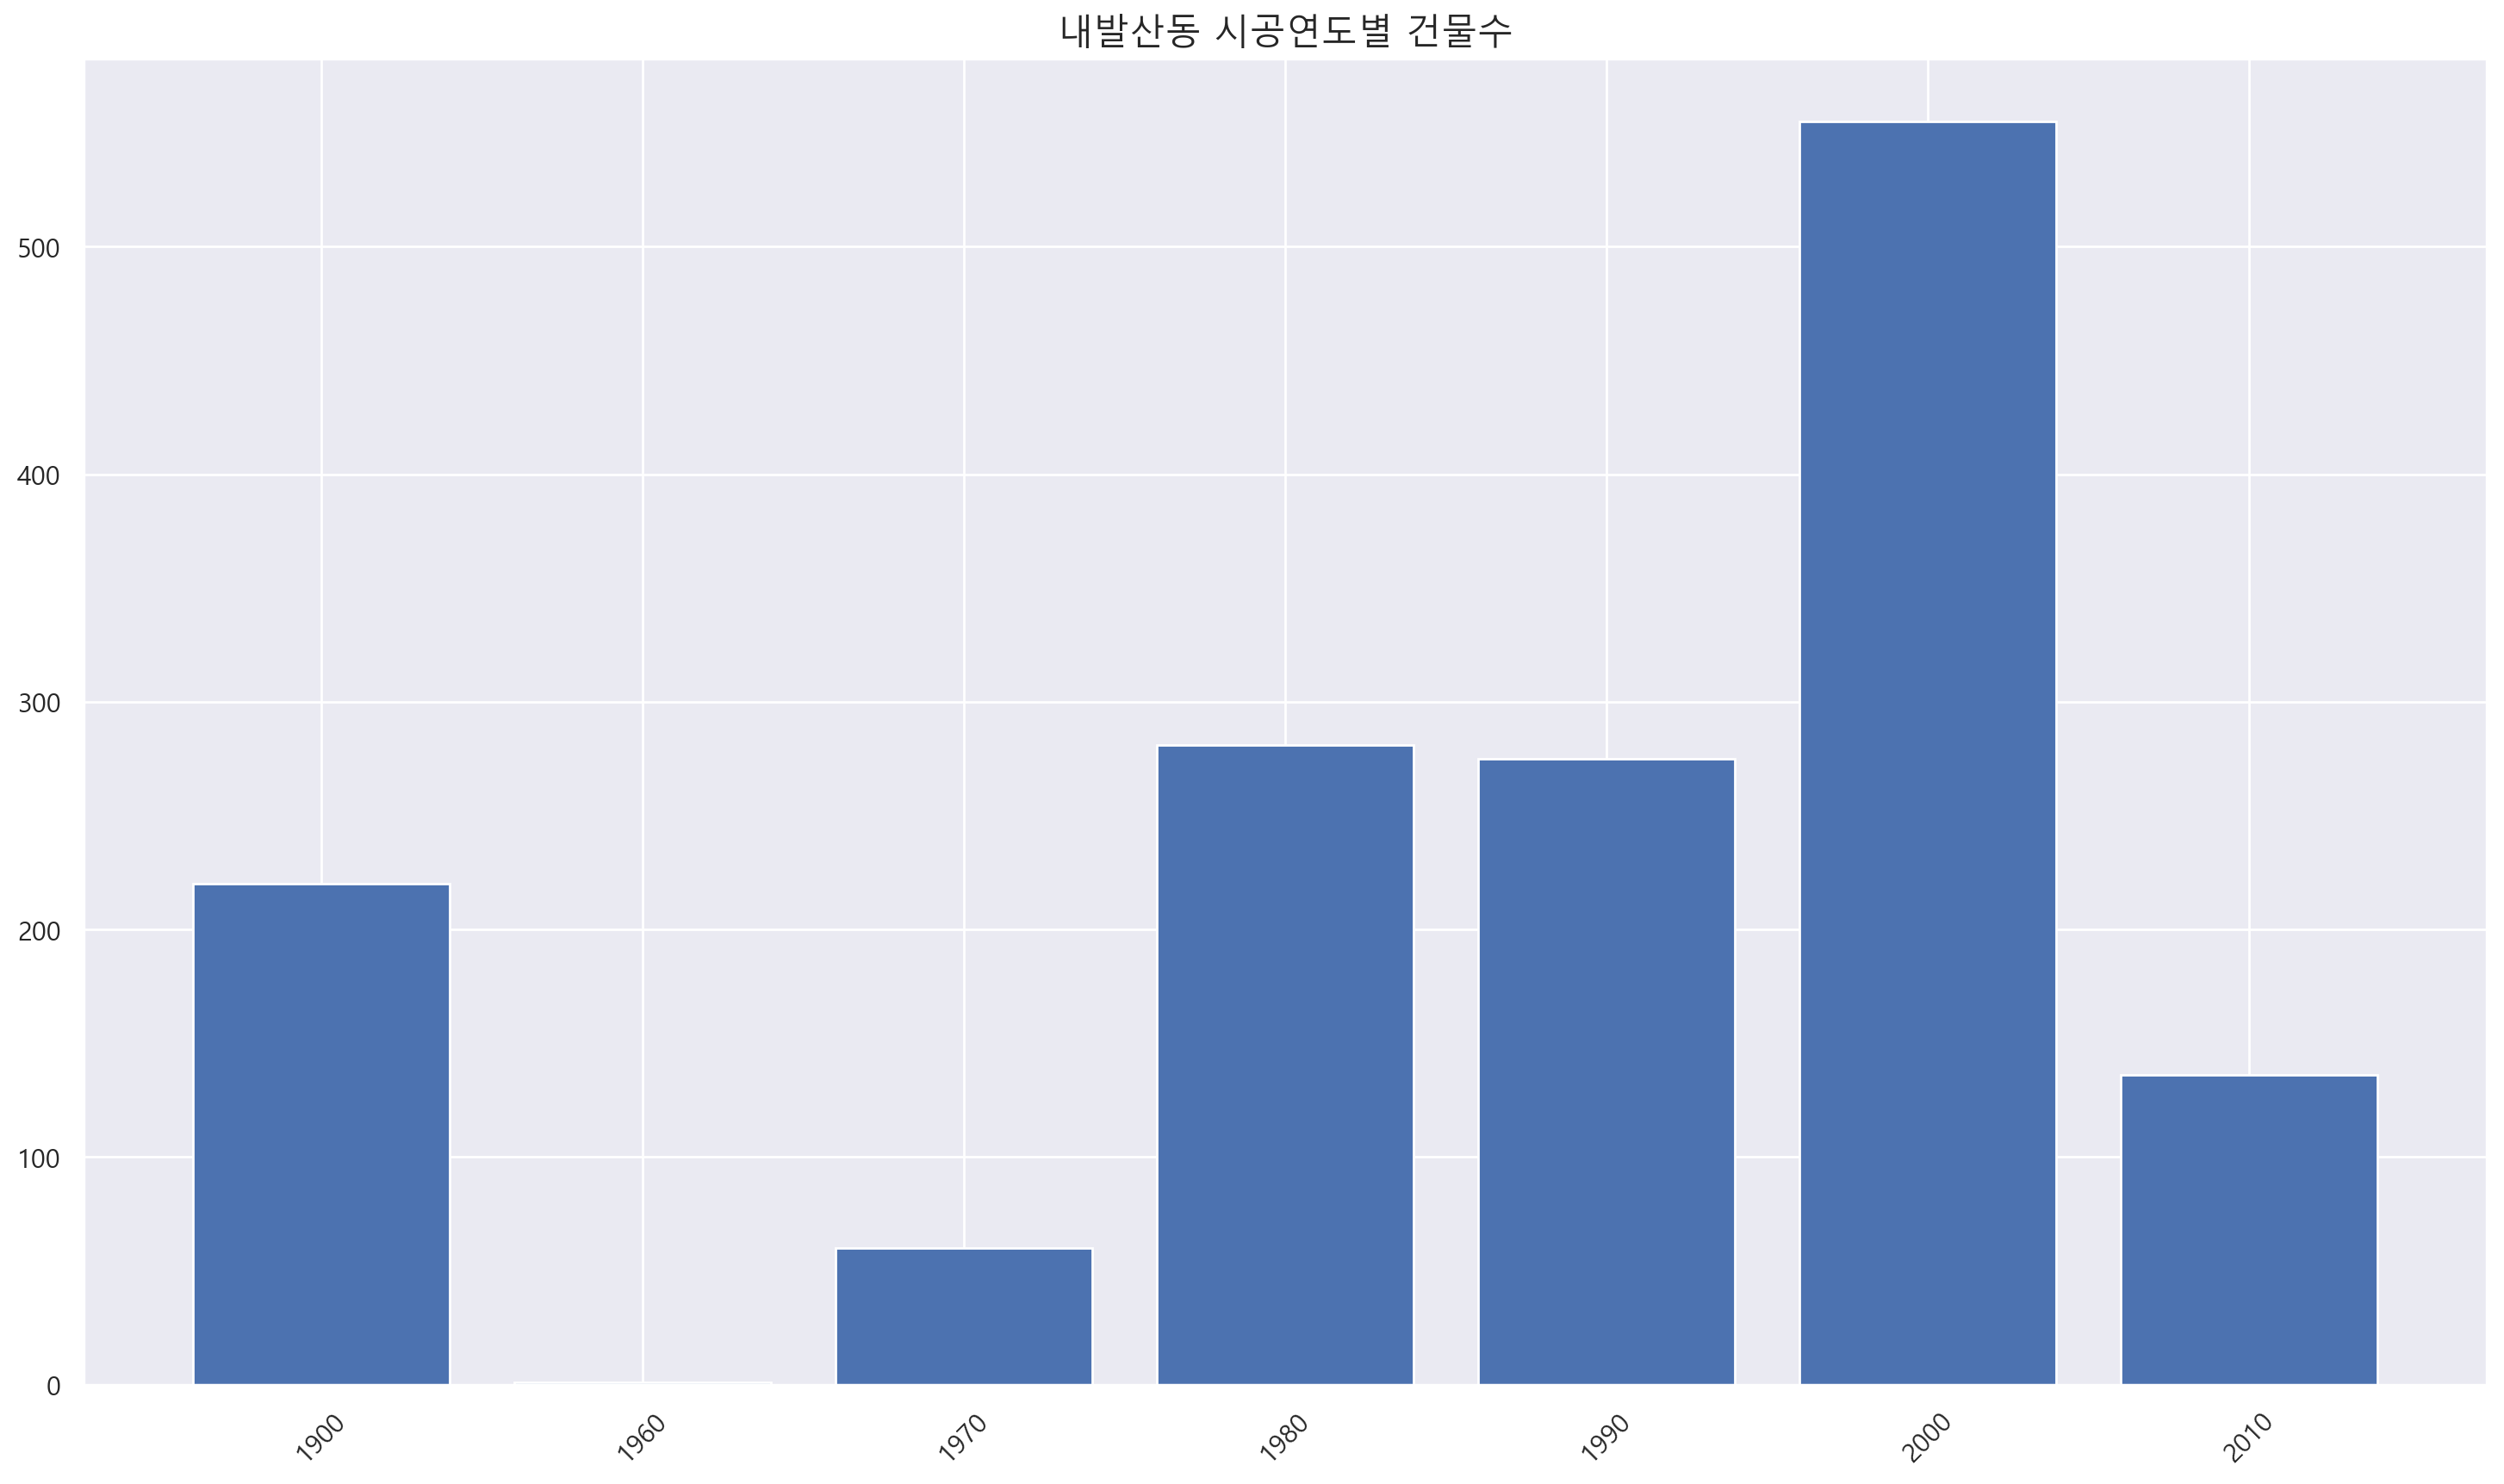

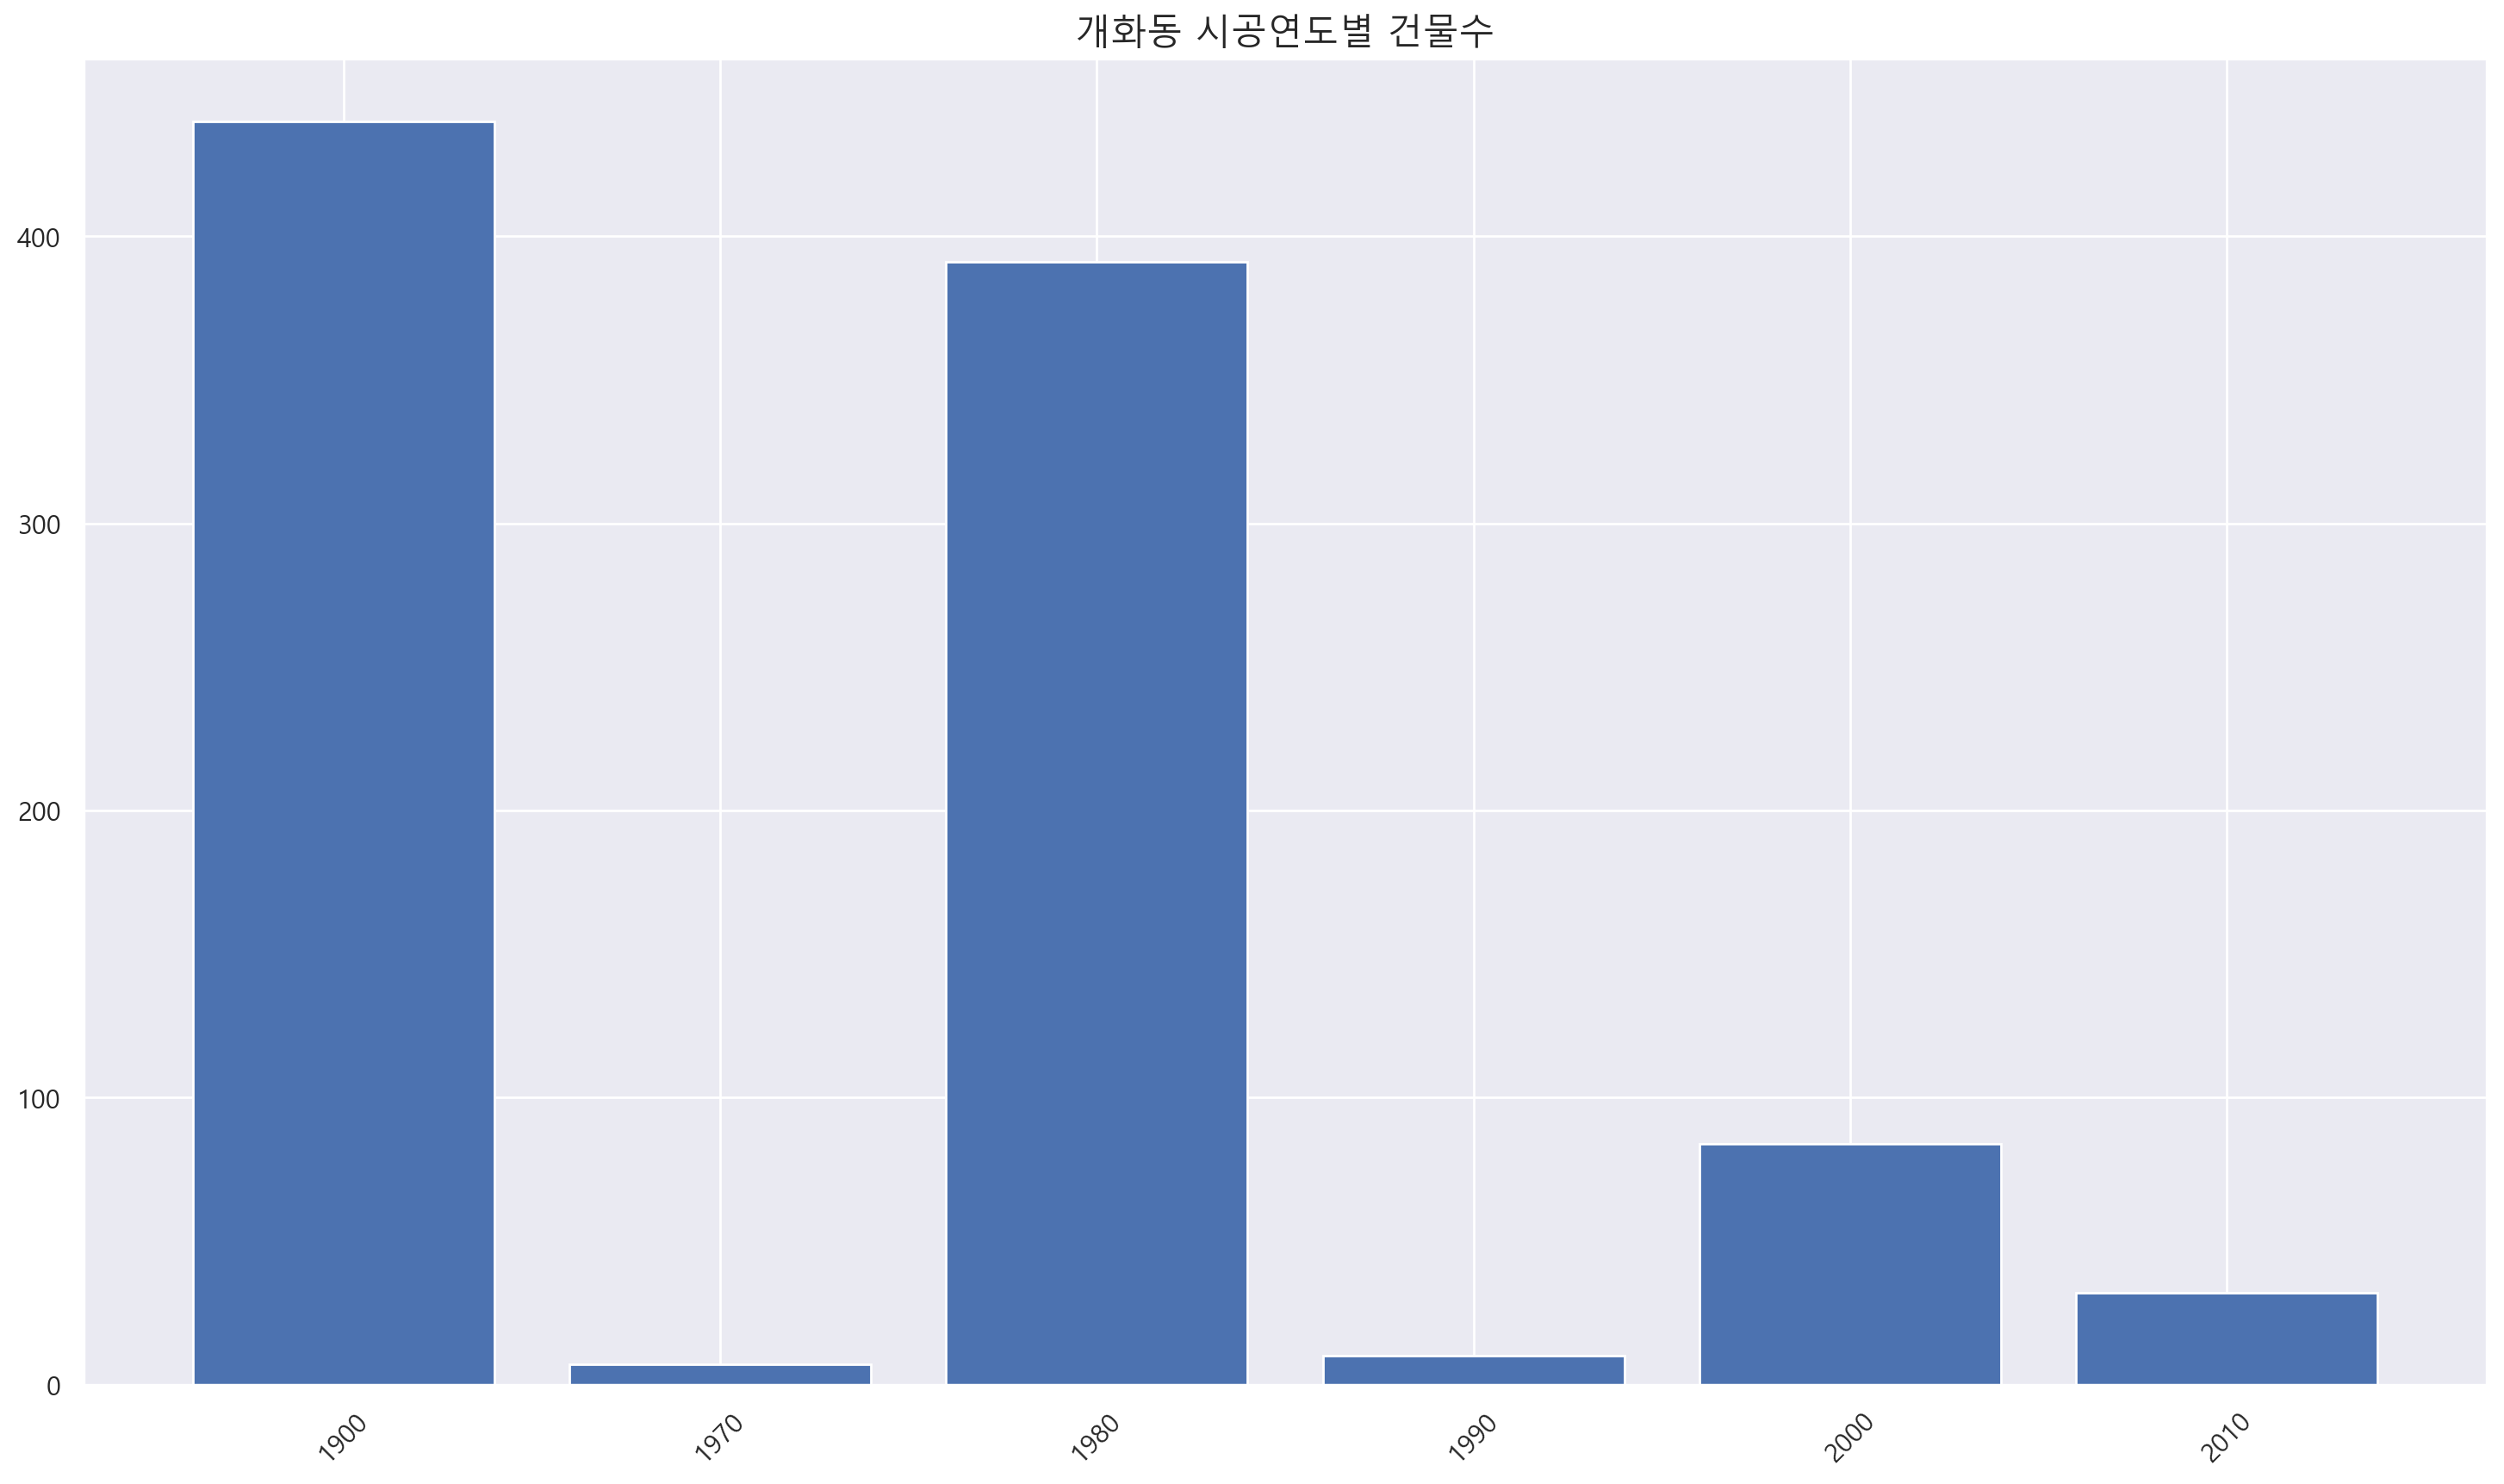

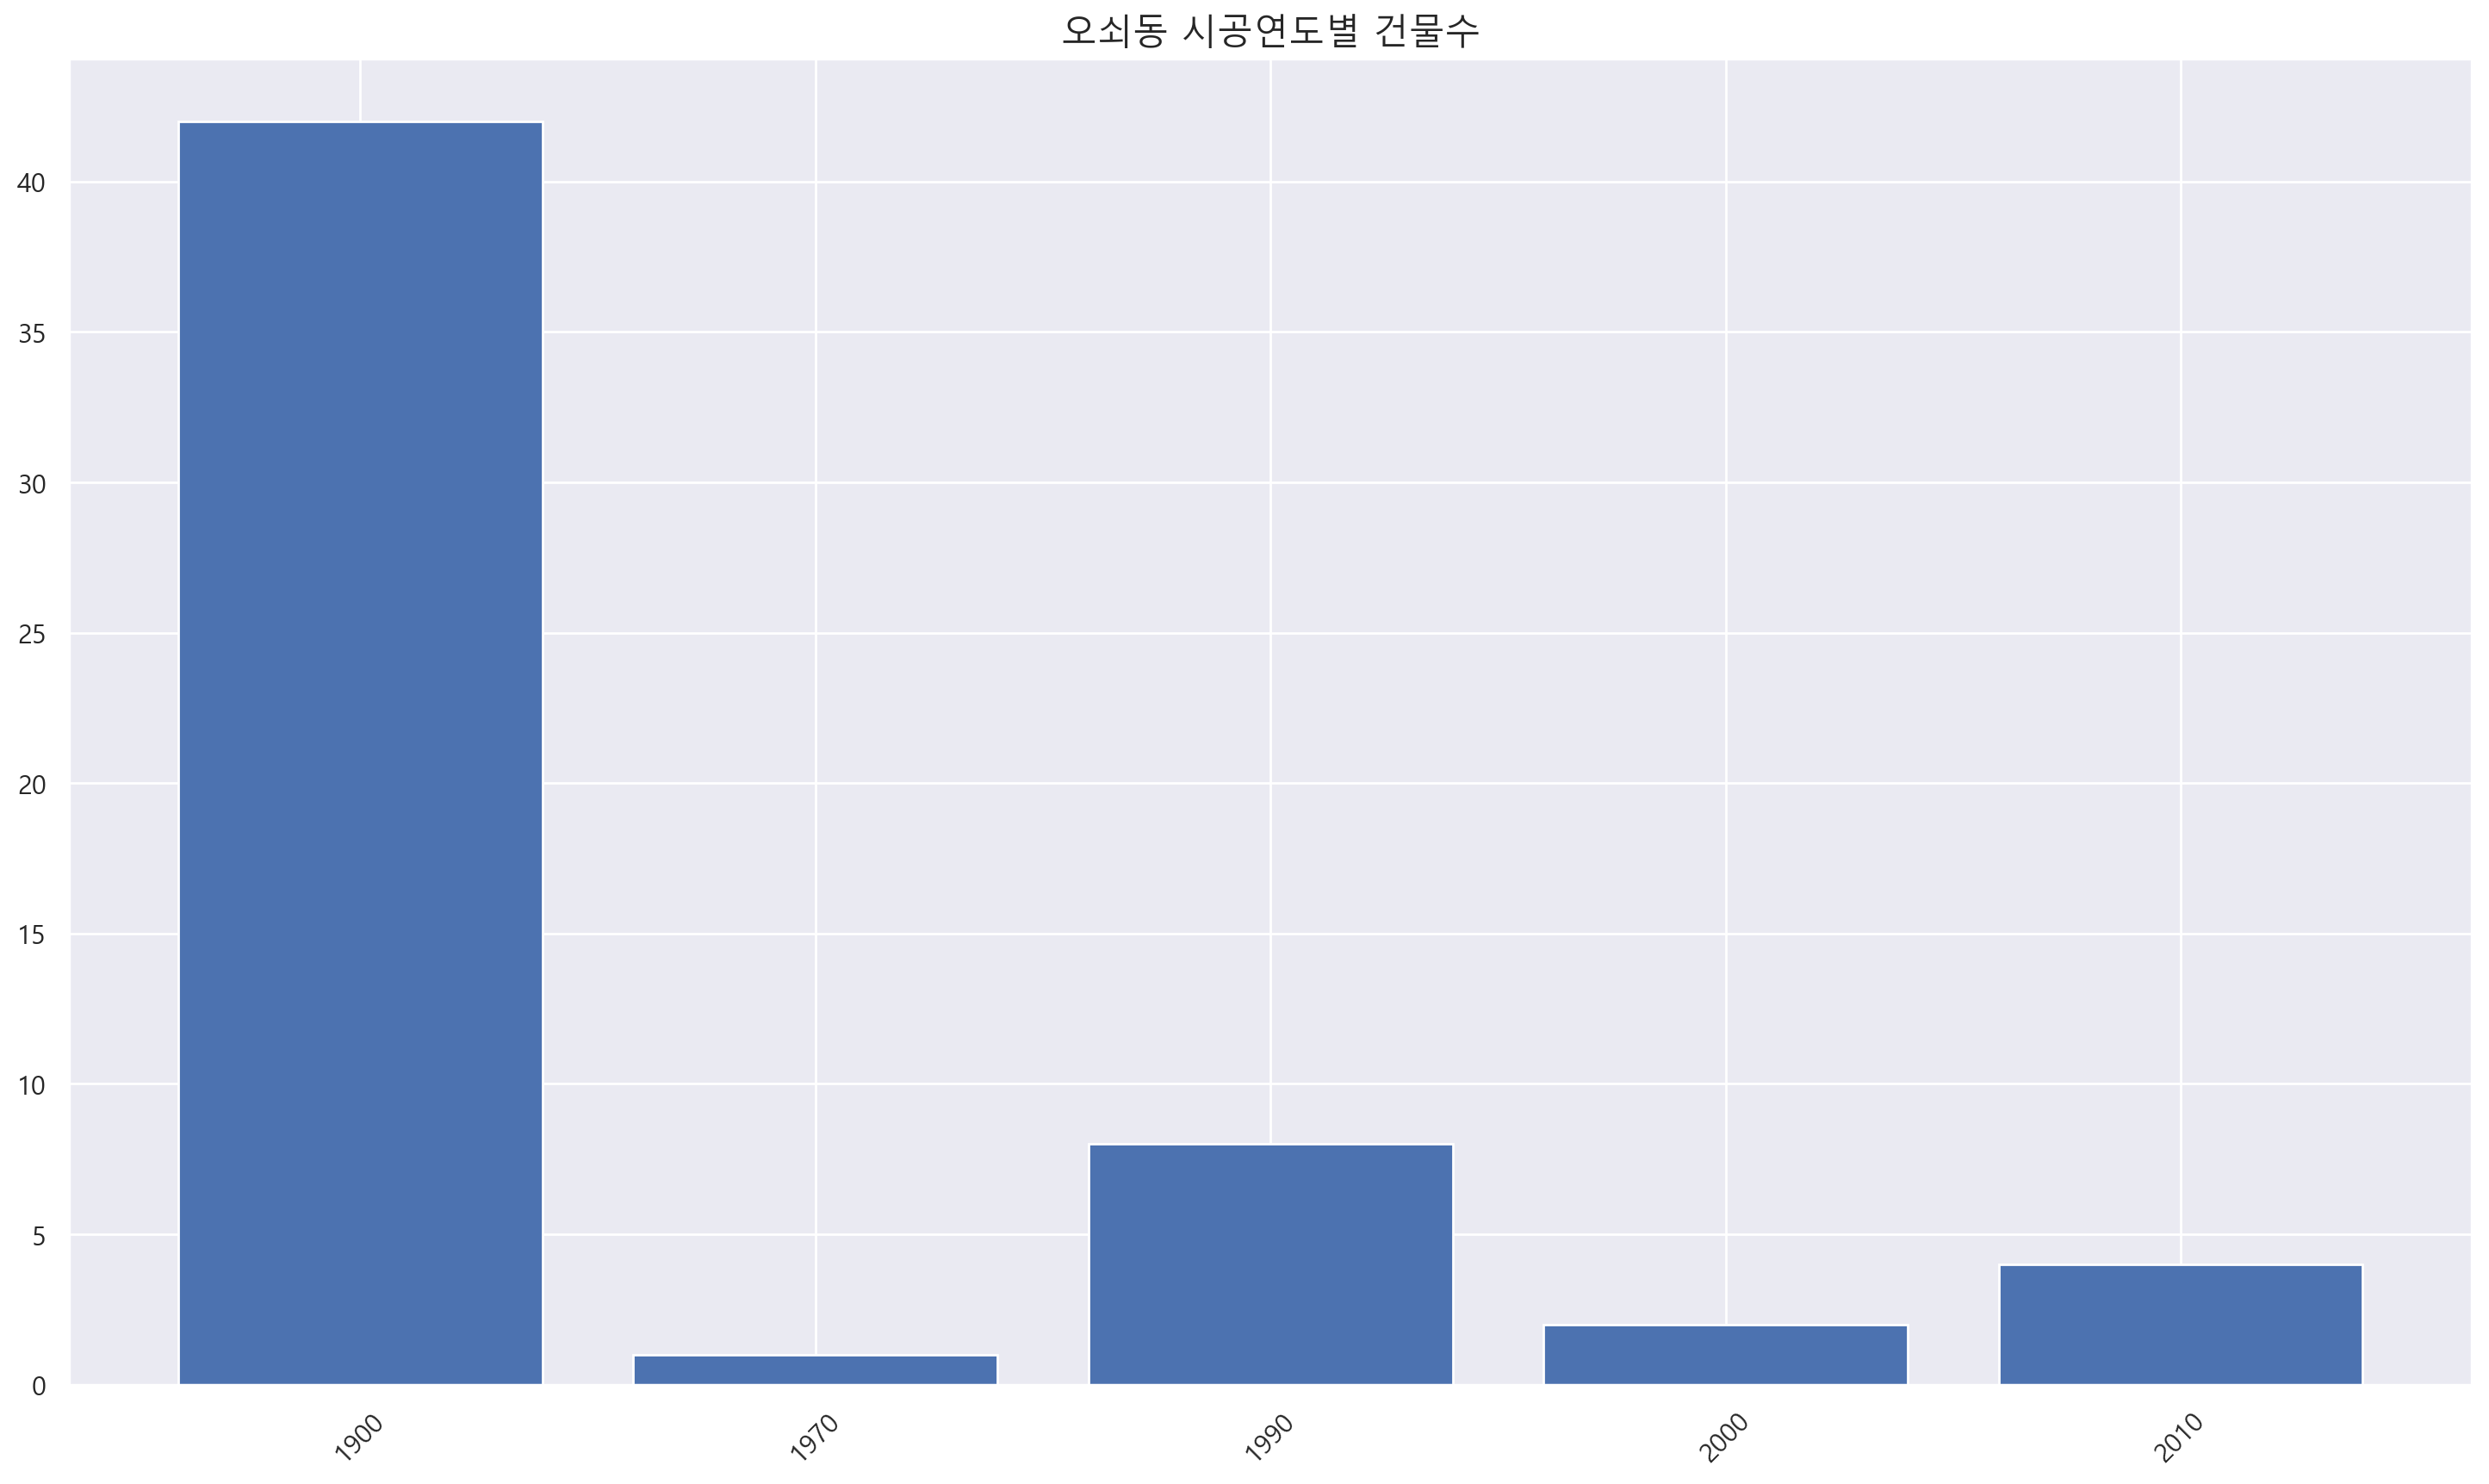

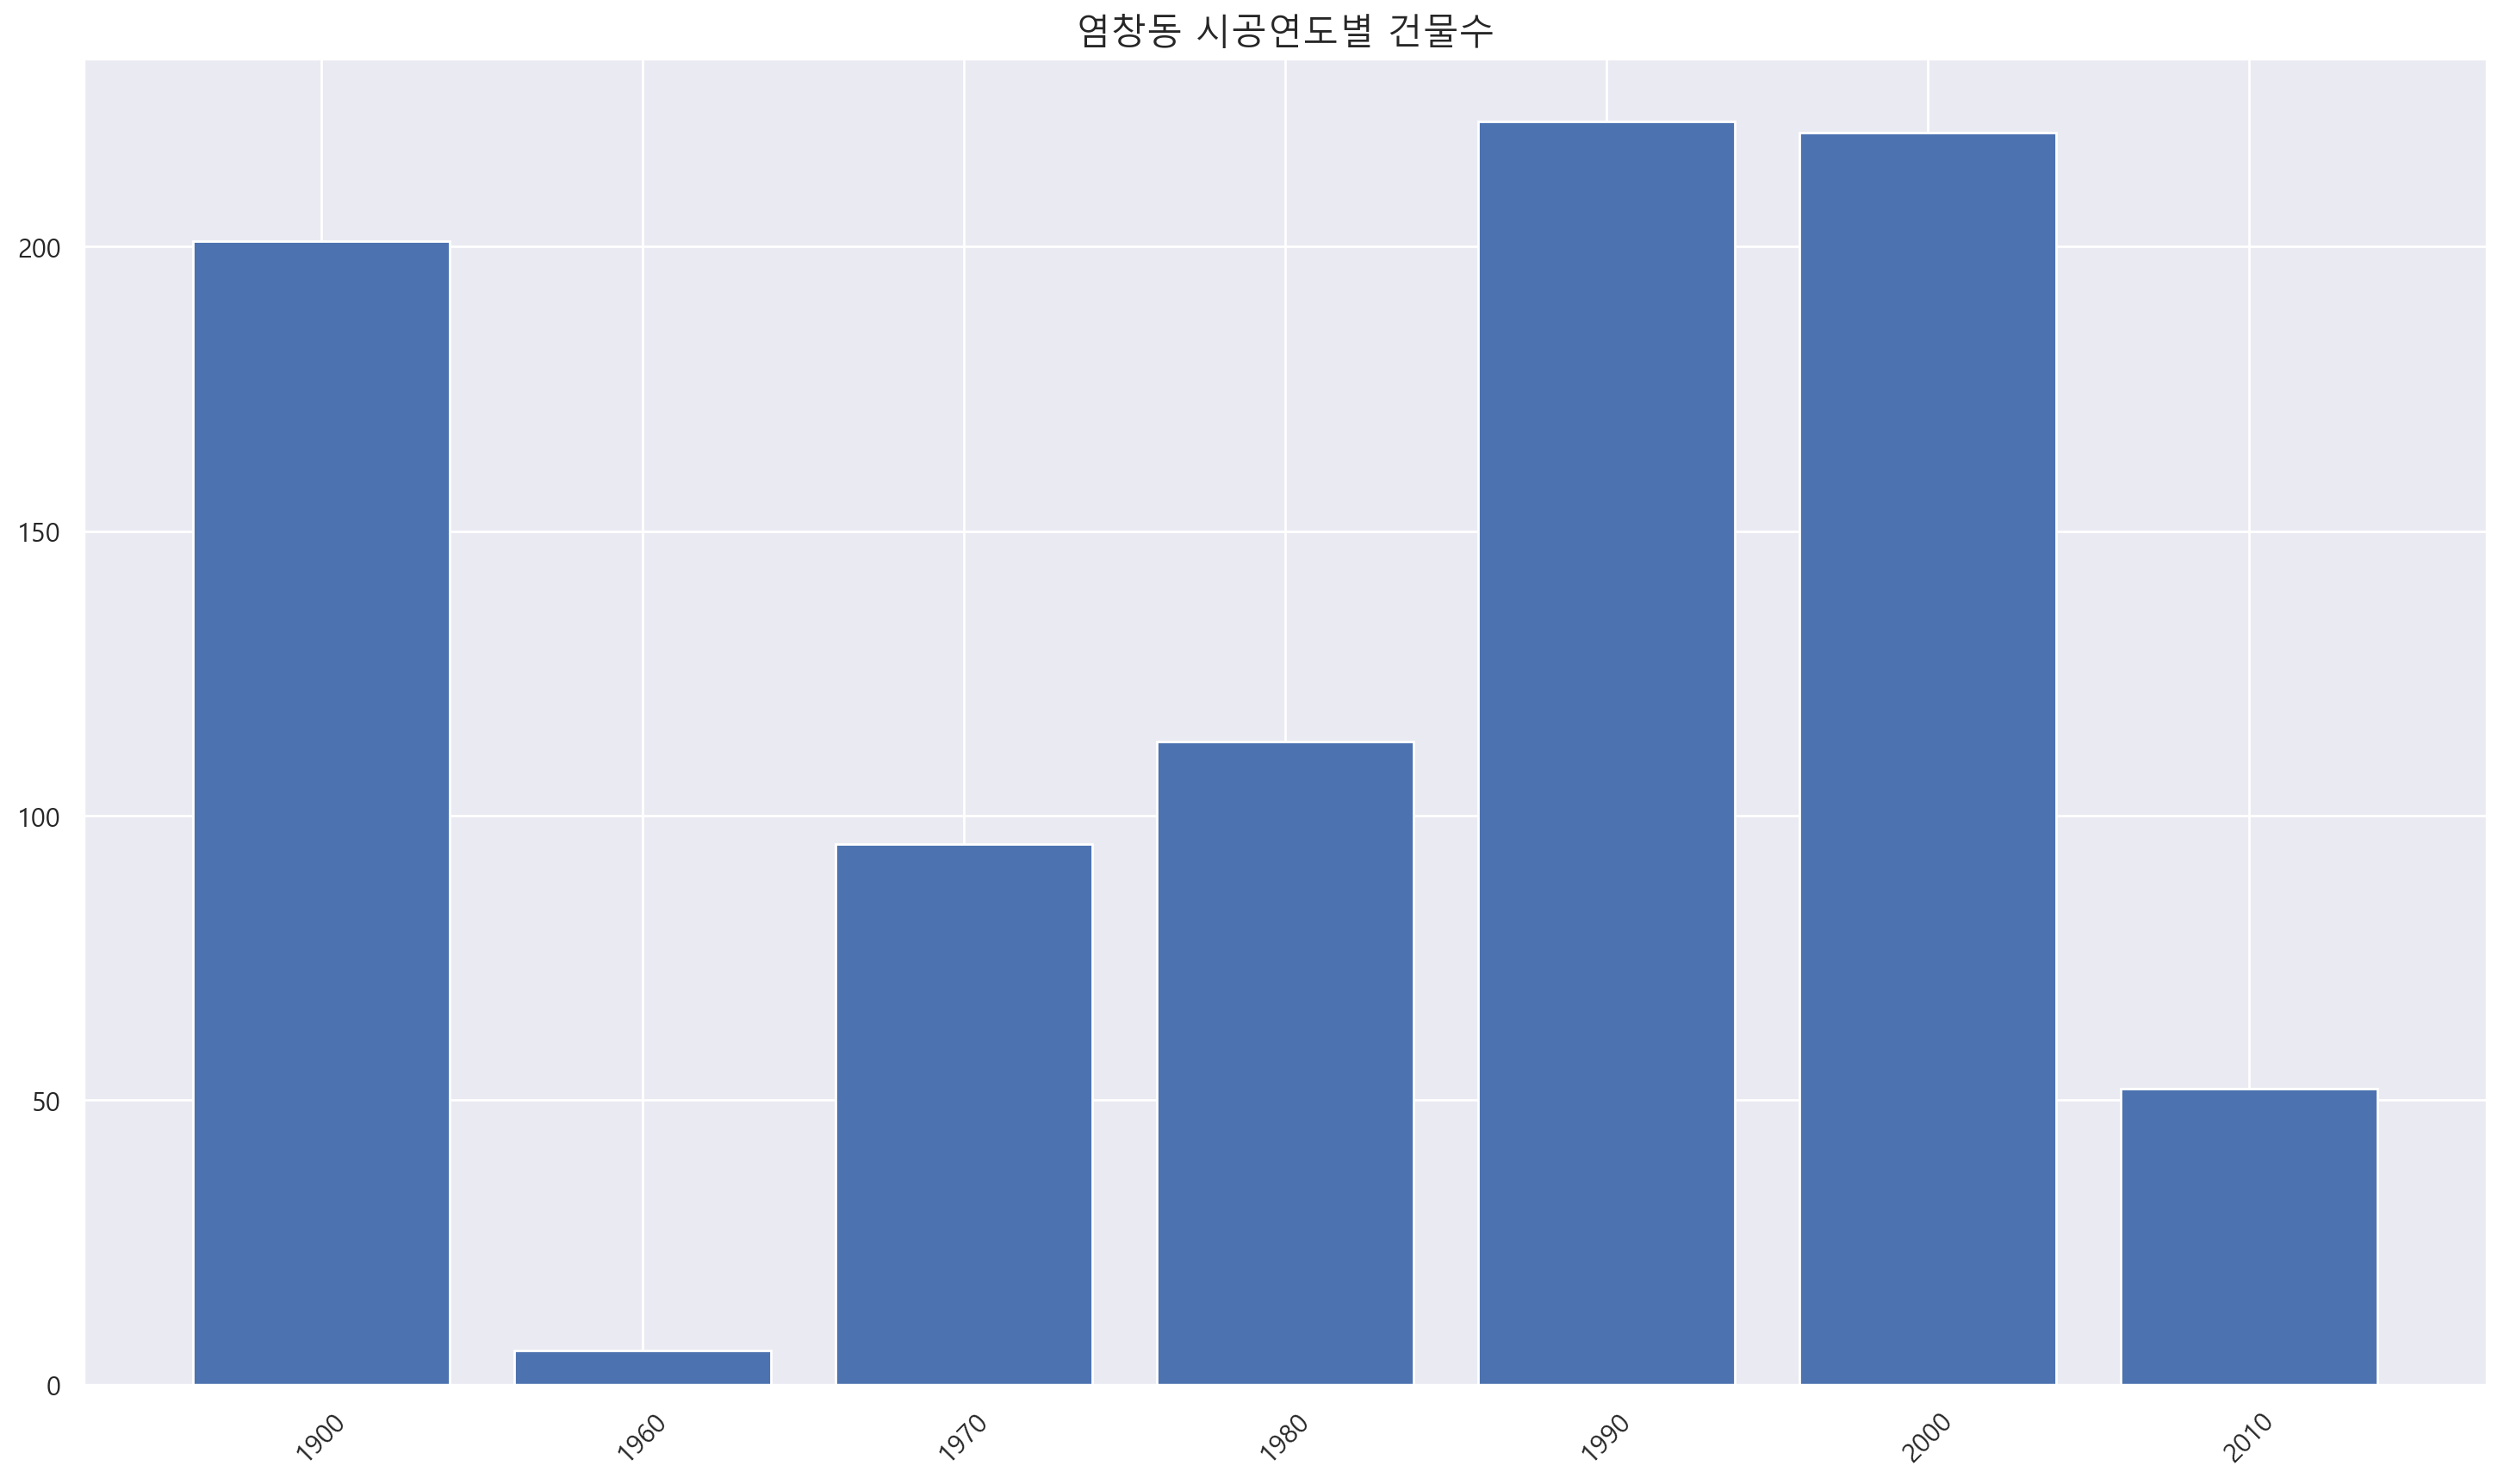

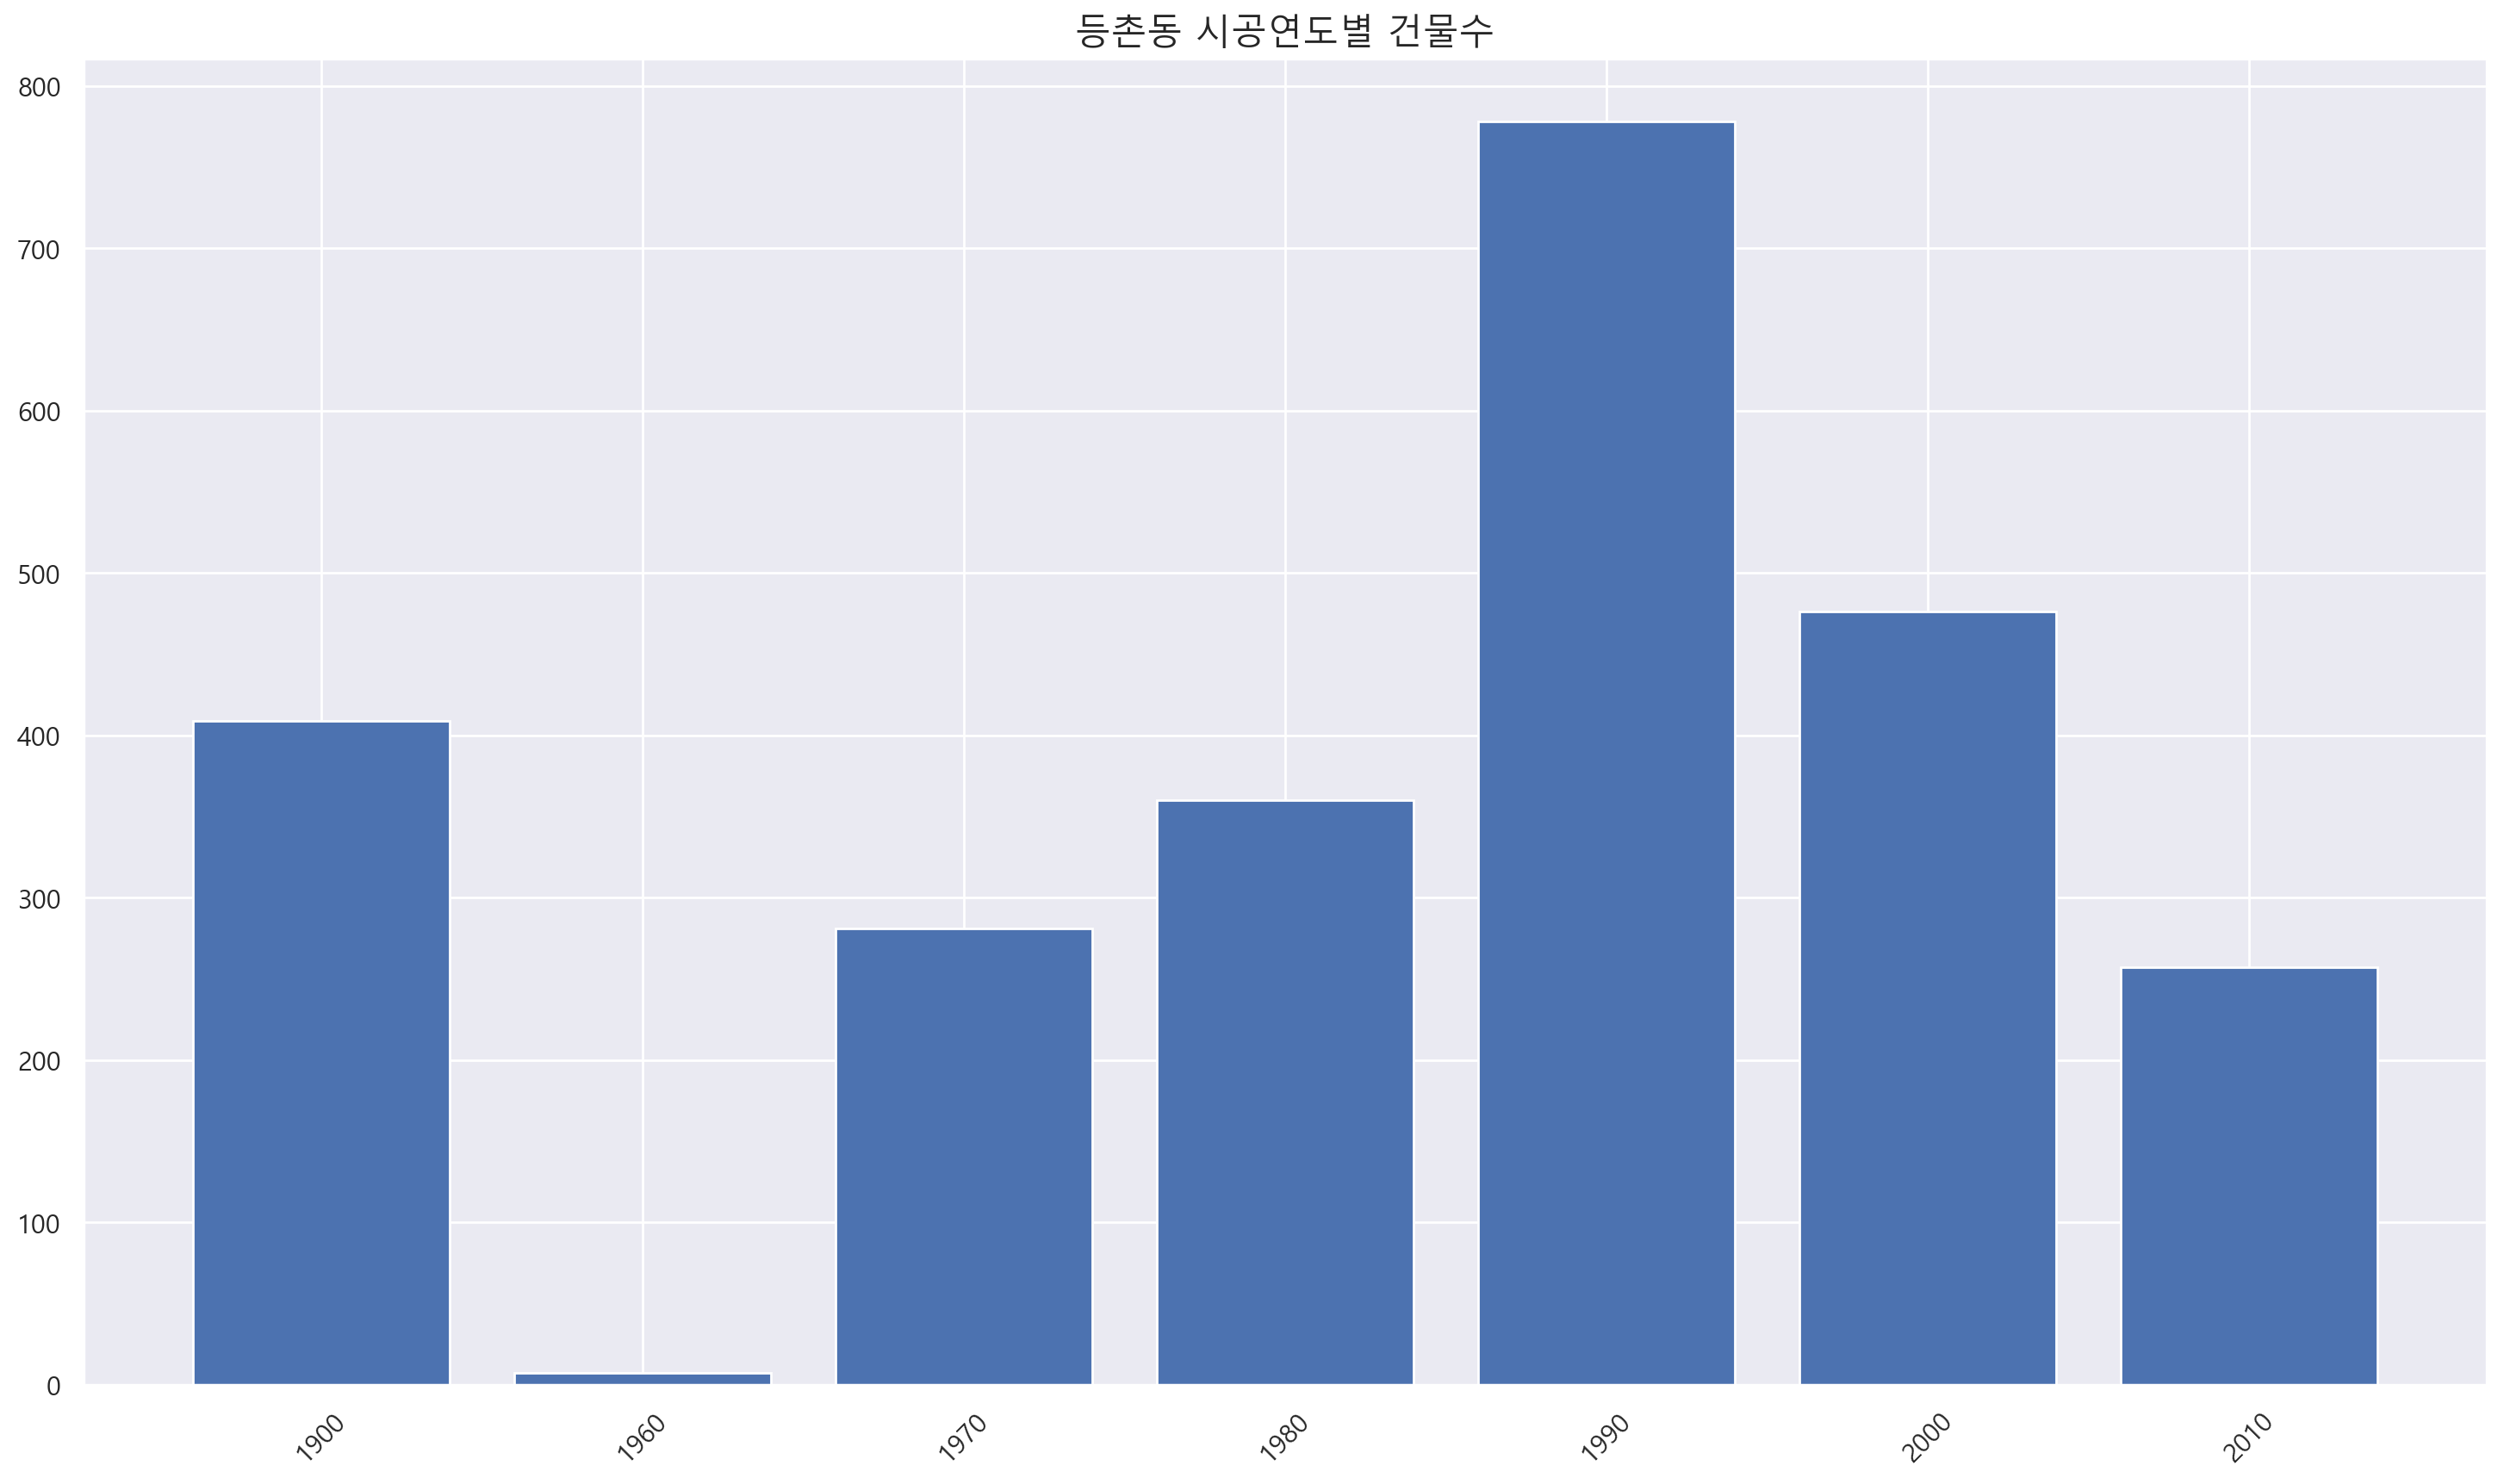

In [41]:
for dong in set(bd_df['법정동명']):
    dong_df = bd_df[bd_df['법정동명'] == dong]
    tmp_s = dong_df['사용승인년대'].value_counts()

    tmp_df = pd.DataFrame({'연도':tmp_s.index, '개수': tmp_s.values}).set_index('연도').sort_index()
    title = f'{dong} 시공연도별 건물수'

    plt.figure(figsize=figure_size)
    plt.bar(tmp_df.index, tmp_df['개수'])
    plt.xticks(rotation=45)
    plt.title(title, size=title_size)
    plt.savefig(f'../../img/건물/동별 건물 노후도/{title}.png')
    plt.show()